In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # plotting and visulisation
import seaborn as sns # nicer (easier) visualisation
%matplotlib inline


# for saving
import os,os.path

### Setting  up directory and filenames

In [2]:
data_Dir = "data/"
fn_patient_info     = data_Dir + 'clinical_data_demo.csv'
fn_fpkm             = data_Dir + 'log2FPKM_rawdata_demo.csv'

### Load Clinical Data

Load the clinical data.
Examine different columns.
Which ones are demographic and clinical information column ?
Which ones are the clinical endpoint columns ?

In [2]:
df_patient_info = pd.read_csv("clinical_data_for_assessment_final.csv", sep = ",")
df_patient_info = df_patient_info.set_index('ID')

df_patient_info.describe(include='all')

df_patient_info


,Gender,Age,clinico.genetic.subgroup,MYCN.status,INSS.Stage,HighRisk,Progression,DeathFromDisease
ID,,,,,,,,
ICGC_001,M,987.0,ST4,1,4,HR,1,1
ICGC_002,M,1808.0,ST4,1,4,HR,1,1
ICGC_003,F,625.0,MNA,Amp,4,HR,1,1
ICGC_004,F,335.0,MNA,Amp,2b,HR,0,0
ICGC_005,F,536.0,MNA,Amp,4,HR,1,1
...,...,...,...,...,...,...,...,...
ICGC_494,M,56.0,ST1,1,1,LR,0,0
ICGC_495,M,163.0,ST1,1,1,LR,0,0
ICGC_496,M,132.0,ST1,1,1,LR,1,0


### Load the RNAs-Seq data

This part already sets the indeces in the DataFrame. Please feel free to change as required. 

In [3]:
df_fpkm = pd.read_csv("allProbIntensities_rawdata_final.csv", sep= ",")

df_fpkm

,Reporter.Identifier,GeneSymbols,ICGC_001_TCGA,ICGC_002_TCGA,ICGC_003_TCGA,ICGC_004,ICGC_005,ICGC_006,ICGC_007,ICGC_008,...,ICGC_489,ICGC_490,ICGC_491_TCGA,ICGC_492,ICGC_493,ICGC_494_TCGA,ICGC_495,ICGC_496_TCGA,ICGC_497,ICGC_498
0,NaN,NaN,14.99,14.94,12.48,14.63,11.89,15.09,13.07,12.00,...,13.62,13.03,14.98,13.36,13.90,13.00,13.79,14.70,14.03,12.31
1,27262.0,NaN,9.20,10.41,9.27,8.83,NaN,10.33,9.62,8.72,...,6.26,5.93,6.97,5.99,7.62,7.76,8.56,7.74,7.57,NaN
2,3180.0,NaN,5.06,5.26,6.45,2.89,2.00,4.80,3.05,6.39,...,0.93,0.58,1.26,1.38,3.49,2.07,2.26,2.29,NaN,2.54
3,41426.0,NaN,7.45,8.68,6.30,7.30,6.26,7.50,7.43,6.98,...,5.35,5.57,5.51,6.30,6.60,6.38,7.49,6.77,8.13,NaN
4,37033.0,NaN,6.74,6.63,6.75,6.20,6.57,6.01,6.78,4.80,...,4.58,4.61,3.54,4.55,4.20,7.16,7.07,5.07,6.28,6.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44703,22435.0,NaN,10.35,10.33,9.81,10.36,9.65,10.46,9.17,10.23,...,8.60,7.37,8.22,8.44,10.17,NaN,10.09,9.68,9.98,9.40
44704,17350.0,NaN,17.05,16.62,17.45,16.72,16.93,17.69,16.85,18.07,...,17.14,16.79,NaN,16.71,16.46,16.83,17.16,17.24,17.11,NaN
44705,28875.0,NaN,5.30,6.84,5.29,5.33,4.81,6.62,6.52,5.37,...,4.07,3.05,2.77,4.14,3.94,4.19,6.85,4.99,4.51,3.34
44706,8993.0,NaN,13.91,13.57,NaN,13.84,13.22,13.79,NaN,13.93,...,13.00,12.18,12.97,13.04,14.19,13.50,NaN,13.99,14.37,NaN


In [4]:
## Rename some columns for clarity

df_fpkm = df_fpkm.rename({'GeneSymbols':'gene_id'},axis=1)
df_fpkm.set_index(['gene_id'])



,Reporter.Identifier,ICGC_001_TCGA,ICGC_002_TCGA,ICGC_003_TCGA,ICGC_004,ICGC_005,ICGC_006,ICGC_007,ICGC_008,ICGC_009_TCGA,...,ICGC_489,ICGC_490,ICGC_491_TCGA,ICGC_492,ICGC_493,ICGC_494_TCGA,ICGC_495,ICGC_496_TCGA,ICGC_497,ICGC_498
gene_id,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,14.99,14.94,12.48,14.63,11.89,15.09,13.07,12.00,NaN,...,13.62,13.03,14.98,13.36,13.90,13.00,13.79,14.70,14.03,12.31
NaN,27262.0,9.20,10.41,9.27,8.83,NaN,10.33,9.62,8.72,9.36,...,6.26,5.93,6.97,5.99,7.62,7.76,8.56,7.74,7.57,NaN
NaN,3180.0,5.06,5.26,6.45,2.89,2.00,4.80,3.05,6.39,6.43,...,0.93,0.58,1.26,1.38,3.49,2.07,2.26,2.29,NaN,2.54
NaN,41426.0,7.45,8.68,6.30,7.30,6.26,7.50,7.43,6.98,8.02,...,5.35,5.57,5.51,6.30,6.60,6.38,7.49,6.77,8.13,NaN
NaN,37033.0,6.74,6.63,6.75,6.20,6.57,6.01,6.78,4.80,5.15,...,4.58,4.61,3.54,4.55,4.20,7.16,7.07,5.07,6.28,6.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,22435.0,10.35,10.33,9.81,10.36,9.65,10.46,9.17,10.23,10.16,...,8.60,7.37,8.22,8.44,10.17,NaN,10.09,9.68,9.98,9.40
NaN,17350.0,17.05,16.62,17.45,16.72,16.93,17.69,16.85,18.07,16.98,...,17.14,16.79,NaN,16.71,16.46,16.83,17.16,17.24,17.11,NaN
NaN,28875.0,5.30,6.84,5.29,5.33,4.81,6.62,6.52,5.37,5.65,...,4.07,3.05,2.77,4.14,3.94,4.19,6.85,4.99,4.51,3.34


In [5]:
## Set "ID" as column indetified for the index column 
df_fpkm.columns.name = 'ID'
df_fpkm

ID,Reporter.Identifier,gene_id,ICGC_001_TCGA,ICGC_002_TCGA,ICGC_003_TCGA,ICGC_004,ICGC_005,ICGC_006,ICGC_007,ICGC_008,...,ICGC_489,ICGC_490,ICGC_491_TCGA,ICGC_492,ICGC_493,ICGC_494_TCGA,ICGC_495,ICGC_496_TCGA,ICGC_497,ICGC_498
0,NaN,NaN,14.99,14.94,12.48,14.63,11.89,15.09,13.07,12.00,...,13.62,13.03,14.98,13.36,13.90,13.00,13.79,14.70,14.03,12.31
1,27262.0,NaN,9.20,10.41,9.27,8.83,NaN,10.33,9.62,8.72,...,6.26,5.93,6.97,5.99,7.62,7.76,8.56,7.74,7.57,NaN
2,3180.0,NaN,5.06,5.26,6.45,2.89,2.00,4.80,3.05,6.39,...,0.93,0.58,1.26,1.38,3.49,2.07,2.26,2.29,NaN,2.54
3,41426.0,NaN,7.45,8.68,6.30,7.30,6.26,7.50,7.43,6.98,...,5.35,5.57,5.51,6.30,6.60,6.38,7.49,6.77,8.13,NaN
4,37033.0,NaN,6.74,6.63,6.75,6.20,6.57,6.01,6.78,4.80,...,4.58,4.61,3.54,4.55,4.20,7.16,7.07,5.07,6.28,6.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44703,22435.0,NaN,10.35,10.33,9.81,10.36,9.65,10.46,9.17,10.23,...,8.60,7.37,8.22,8.44,10.17,NaN,10.09,9.68,9.98,9.40
44704,17350.0,NaN,17.05,16.62,17.45,16.72,16.93,17.69,16.85,18.07,...,17.14,16.79,NaN,16.71,16.46,16.83,17.16,17.24,17.11,NaN
44705,28875.0,NaN,5.30,6.84,5.29,5.33,4.81,6.62,6.52,5.37,...,4.07,3.05,2.77,4.14,3.94,4.19,6.85,4.99,4.51,3.34
44706,8993.0,NaN,13.91,13.57,NaN,13.84,13.22,13.79,NaN,13.93,...,13.00,12.18,12.97,13.04,14.19,13.50,NaN,13.99,14.37,NaN


### Examine the clinical data

Progression    0   1
Gender              
F             94  61
M            132  86


<Axes: >

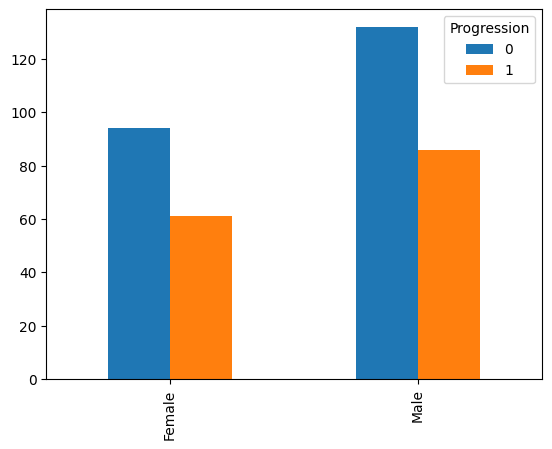

In [10]:
## Gender Vs Progression From Disease ##
gender_vs_pro = pd.DataFrame(pd.crosstab( df_patient_info["Gender"], df_patient_info["Progression"] ))
print(gender_vs_pro)
gender_vs_pro.index = ["Female", "Male"]

gender_vs_pro.plot.bar()

DeathFromDisease    0   1
Gender                   
F                 112  43
M                 165  53


<Axes: >

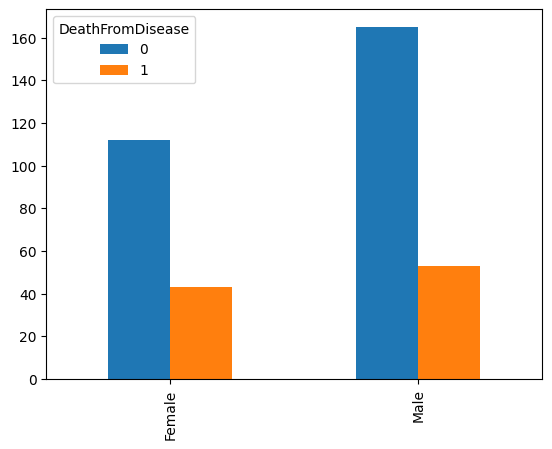

In [11]:
## Gender Vs Death From Disease ##
gender_vs_dfd = pd.DataFrame(pd.crosstab( df_patient_info["Gender"], df_patient_info["DeathFromDisease"] ))
print(gender_vs_dfd)
gender_vs_dfd.index = ["Female", "Male"]

gender_vs_dfd.plot.bar()

INSS.Stage   1  2  2a  2b  3    4  4S
Gender                               
F           57  0   2   1  6   70  19
M           63  1   1   0  9  111  33


<Axes: >

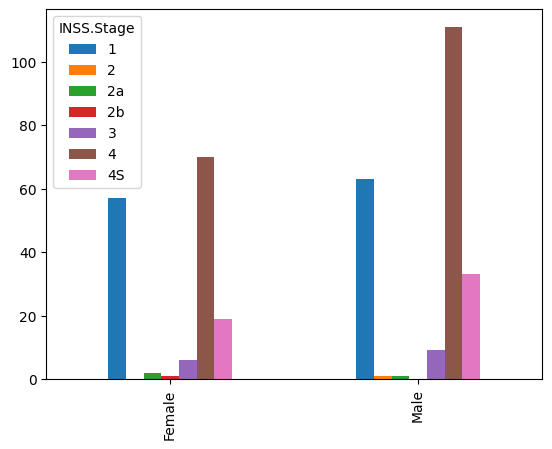

In [12]:
## Gender Vs Death From INSS.status ##
gender_vs_ins = pd.DataFrame(pd.crosstab( df_patient_info["Gender"], df_patient_info["INSS.Stage"] ))
print(gender_vs_ins)
gender_vs_ins.index = ["Female", "Male"]
gender_vs_ins.plot.bar()

MYCN.status    1  Amp
Gender               
F            111   44
M            170   48


<Axes: >

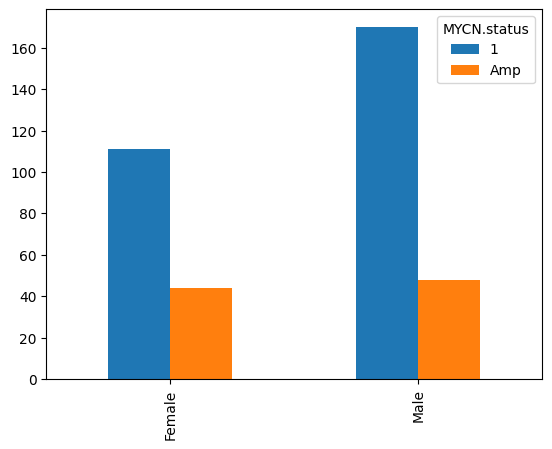

In [6]:
## Gender Vs Death From MYCN.status ##

gender_vs_myc = pd.DataFrame(pd.crosstab( df_patient_info["Gender"], df_patient_info["MYCN.status"] ))
print(gender_vs_myc)
gender_vs_myc.index = ["Female", "Male"]
gender_vs_myc.plot.bar()

#### Now Let's do the same for the Clinico Genetic Group 

- How many unique fields are there ? Anwser : We know from above it's 2.
- What does it mean ? Anwser : Pleas look at the reference paper. 


In [8]:
df_patient_info["clinico.genetic.subgroup"].unique()

array(['ST4', 'MNA', 'ST4S', 'ST1'], dtype=object)

In [9]:
def cross_comparison(factor1 = None, factor2 = None ):
    factor1_vs_factor2 = pd.DataFrame(pd.crosstab( df_patient_info[factor1], df_patient_info[factor2] ))
    print(factor1_vs_factor2)
    # factor1_vs_factor2.index = df_patient_info[factor1].unique()
    factor1_vs_factor2.plot.bar()

HighRisk     HR   LR
INSS.Stage          
1             3  117
2             1    0
2a            3    0
2b            1    0
3            15    0
4           148   33
4S            4   48


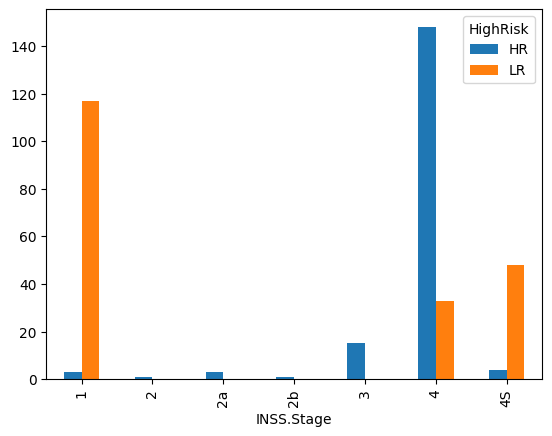

In [10]:
cross_comparison(factor1 = "INSS.Stage", factor2 = "HighRisk" )

In [11]:
## Boxplot
df_patient_info [ ["Gender", "Age"] ]
df_patient_info [ ["HighRisk", "Age"] ]

df_patient_info [ ["DeathFromDisease", "Age"] ]
df_patient_info [ ["Progression", "Age"] ]



,Progression,Age
ID,,
ICGC_001,1,987.0
ICGC_002,1,1808.0
ICGC_003,1,625.0
ICGC_004,0,335.0
ICGC_005,1,536.0
...,...,...
ICGC_494,0,56.0
ICGC_495,0,163.0
ICGC_496,1,132.0


<Axes: xlabel='Progression', ylabel='Age'>

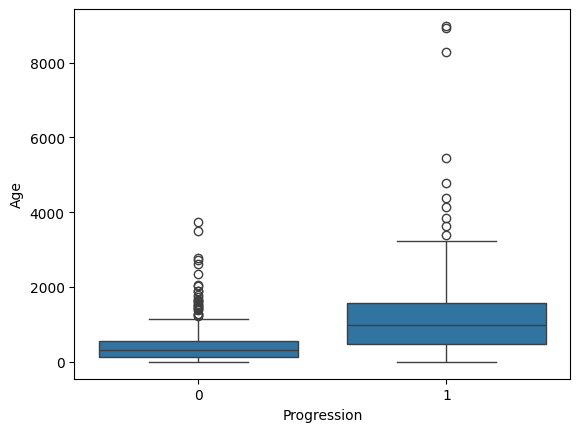

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot( x = "Progression", y = "Age", data = df_patient_info )

<Axes: xlabel='DeathFromDisease', ylabel='Age'>

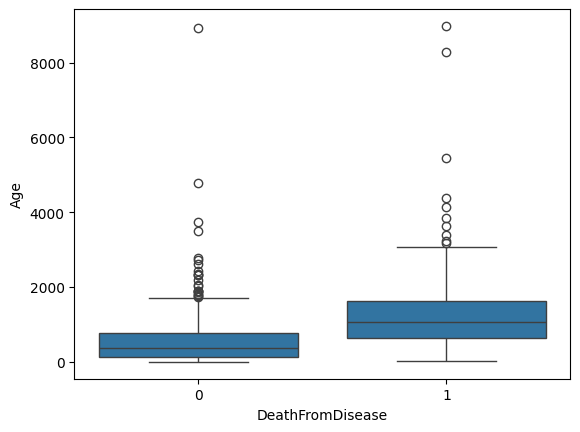

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot( x = "DeathFromDisease", y = "Age", data = df_patient_info )



<AxesSubplot:>

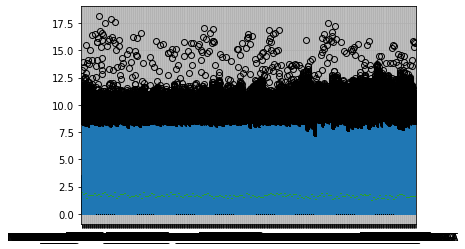

In [103]:
#df_fpkm.boxplot()

#### Now Let's find the common samples between the clinical data and RNA Seq Data


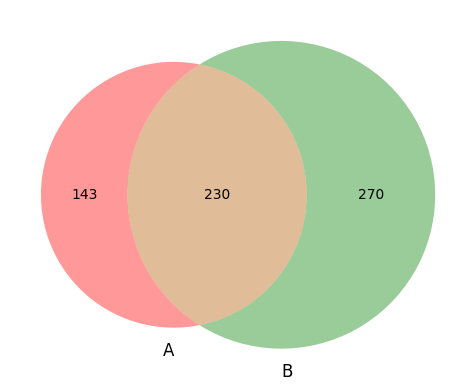

In [14]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

clinical_ids = set(df_patient_info.index)
sample_ids = set(df_fpkm.columns)

missing_samples =  clinical_ids.intersection(sample_ids)

# Use the venn2 function
venn2([set(clinical_ids), set(sample_ids)])
plt.show()


In [16]:
missing_in_clinical = list(set(df_patient_info.index.to_list()) - set(df_fpkm.columns.to_list()))

print(df_patient_info.index.to_list())
print(missing_in_clinical)
#missing_in_clinical


missing_in_RNA = list( set(df_fpkm.columns.to_list()) - set(df_patient_info.index.to_list()))

print(missing_in_RNA)


fpkm_sample_names = df_fpkm.columns.to_list()
# print(df_patient_info.index.to_list()[20])
# print(fpkm_sample_names)

# missing_in_RNA_now = list( set(fpkm_sample_names_updated) - set(df_patient_info.index.to_list()))
# print(missing_in_RNA_now)


['ICGC_001', 'ICGC_002', 'ICGC_003', 'ICGC_004', 'ICGC_005', 'ICGC_006', 'ICGC_007', 'ICGC_008', 'ICGC_009', 'ICGC_010', 'ICGC_012', 'ICGC_013', 'ICGC_015', 'ICGC_016', 'ICGC_019', 'ICGC_020', 'ICGC_021', 'ICGC_022', 'ICGC_023', 'ICGC_024', 'ICGC_025', 'ICGC_026', 'ICGC_027', 'ICGC_028', 'ICGC_029', 'ICGC_030', 'ICGC_031', 'ICGC_032', 'ICGC_033', 'ICGC_034', 'ICGC_035', 'ICGC_036', 'ICGC_037', 'ICGC_038', 'ICGC_050', 'ICGC_051', 'ICGC_052', 'ICGC_053', 'ICGC_054', 'ICGC_055', 'ICGC_056', 'ICGC_057', 'ICGC_058', 'ICGC_059', 'ICGC_060', 'ICGC_080', 'ICGC_081', 'ICGC_082', 'ICGC_083', 'ICGC_084', 'ICGC_085', 'ICGC_086', 'ICGC_087', 'ICGC_088', 'ICGC_089', 'ICGC_090', 'ICGC_091', 'ICGC_092', 'ICGC_093', 'ICGC_094', 'ICGC_095', 'ICGC_096', 'ICGC_097', 'ICGC_098', 'ICGC_099', 'ICGC_100', 'ICGC_101', 'ICGC_102', 'ICGC_103', 'ICGC_104', 'ICGC_105', 'ICGC_106', 'ICGC_107', 'ICGC_108', 'ICGC_109', 'ICGC_110', 'ICGC_111', 'ICGC_113', 'ICGC_114', 'ICGC_133', 'ICGC_136', 'ICGC_137', 'ICGC_138', 'IC

#### Write a code segment to remove the additional string from the FPKM File name ##

In [17]:
## Function to split a string based on separator and return the first value
def correct_sample_names(sample_name=None, separator = "_"):
    parts = sample_name.split(separator)
    if len(parts) > 1:
        return parts[0] + separator + parts[1]
    return sample_name
 

print("Before Update")
print(fpkm_sample_names)

fpkm_sample_names_updated = [correct_sample_names(sub) for sub in fpkm_sample_names]

print("After Update")
print(fpkm_sample_names_updated)



Before Update
['Reporter.Identifier', 'gene_id', 'ICGC_001_TCGA', 'ICGC_002_TCGA', 'ICGC_003_TCGA', 'ICGC_004', 'ICGC_005', 'ICGC_006', 'ICGC_007', 'ICGC_008', 'ICGC_009_TCGA', 'ICGC_010', 'ICGC_011', 'ICGC_012', 'ICGC_013', 'ICGC_014_TCGA', 'ICGC_015_TCGA', 'ICGC_016', 'ICGC_017_TCGA', 'ICGC_018_TCGA', 'ICGC_019', 'ICGC_020', 'ICGC_021', 'ICGC_022', 'ICGC_023', 'ICGC_024_TCGA', 'ICGC_025_TCGA', 'ICGC_026_TCGA', 'ICGC_027_TCGA', 'ICGC_028_TCGA', 'ICGC_029', 'ICGC_030_TCGA', 'ICGC_031', 'ICGC_032', 'ICGC_033_TCGA', 'ICGC_034', 'ICGC_035_TCGA', 'ICGC_036', 'ICGC_037_TCGA', 'ICGC_038', 'ICGC_039_TCGA', 'ICGC_040', 'ICGC_041', 'ICGC_042', 'ICGC_043_TCGA', 'ICGC_044_TCGA', 'ICGC_045', 'ICGC_046_TCGA', 'ICGC_047_TCGA', 'ICGC_048', 'ICGC_049_TCGA', 'ICGC_050', 'ICGC_051', 'ICGC_052', 'ICGC_053', 'ICGC_054', 'ICGC_055_TCGA', 'ICGC_056', 'ICGC_057', 'ICGC_058', 'ICGC_059', 'ICGC_060_TCGA', 'ICGC_061_TCGA', 'ICGC_062_TCGA', 'ICGC_063_TCGA', 'ICGC_064', 'ICGC_065_TCGA', 'ICGC_066', 'ICGC_067_TCGA

In [214]:
## Assign the updated samples names back to the RNA Seq Data frame
df_fpkm.columns = fpkm_sample_names_updated
print(df_fpkm.columns)


Index(['Reporter.Identifier', 'gene_id', 'ICGC_001', 'ICGC_002', 'ICGC_003',
       'ICGC_004', 'ICGC_005', 'ICGC_006', 'ICGC_007', 'ICGC_008',
       ...
       'ICGC_489', 'ICGC_490', 'ICGC_491', 'ICGC_492', 'ICGC_493', 'ICGC_494',
       'ICGC_495', 'ICGC_496', 'ICGC_497', 'ICGC_498'],
      dtype='object', length=500)


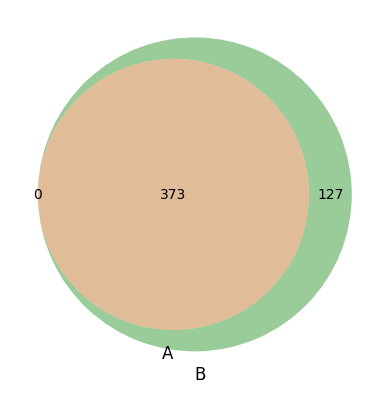

373


In [19]:
# Use the venn2 function
venn2([set(clinical_ids), set(fpkm_sample_names_updated)])
plt.show()

print(len(clinical_ids))

In [20]:
common_samples = list(clinical_ids.intersection( set(df_fpkm.columns) ) )
print(len(common_samples))

373


<bound method IndexOpsMixin.tolist of Index(['Reporter.Identifier', 'gene_id', 'ICGC_001', 'ICGC_002', 'ICGC_003',
       'ICGC_004', 'ICGC_005', 'ICGC_006', 'ICGC_007', 'ICGC_008',
       ...
       'ICGC_489', 'ICGC_490', 'ICGC_491', 'ICGC_492', 'ICGC_493', 'ICGC_494',
       'ICGC_495', 'ICGC_496', 'ICGC_497', 'ICGC_498'],
      dtype='object', length=500)>


In [21]:
## Now Subset the common samples ##

common_samples = list(clinical_ids.intersection( set(df_fpkm.columns) ) )
print(len(common_samples))


## Subset common clinical samples #
df_patient_info["ID"] = df_patient_info.index
df_common_patient_info = df_patient_info[ df_patient_info["ID"].isin(common_samples) ]
print(df_common_patient_info.shape)

df_common_patient_info.to_csv("df_common_patient_info.csv", sep = ",")

## Subset FPKM Sample #
df_columns = df_fpkm.columns
df_common_fpkm = df_fpkm[ ["Reporter.Identifier"] +common_samples]
print(df_common_fpkm.shape)
#df_common_patient_info
df_common_fpkm


373
(373, 9)
(44708, 374)


,Reporter.Identifier,ICGC_056,ICGC_458,ICGC_327,ICGC_460,ICGC_305,ICGC_021,ICGC_199,ICGC_295,ICGC_340,...,ICGC_423,ICGC_093,ICGC_140,ICGC_461,ICGC_080,ICGC_133,ICGC_166,ICGC_086,ICGC_006,ICGC_268
0,NaN,14.51,13.07,12.26,11.04,15.67,11.84,14.76,14.53,12.63,...,13.08,NaN,14.39,9.99,12.99,12.92,14.85,13.47,15.09,14.16
1,27262.0,10.47,7.52,7.11,6.35,8.62,8.89,9.62,7.31,7.87,...,7.34,10.38,8.80,5.77,9.53,9.05,NaN,9.65,10.33,7.06
2,3180.0,6.94,1.72,NaN,1.43,3.91,5.47,NaN,2.93,NaN,...,2.93,3.74,1.89,1.26,NaN,3.17,3.17,2.77,4.80,2.56
3,41426.0,7.22,6.51,6.33,2.66,7.54,8.36,7.67,5.52,NaN,...,5.43,NaN,5.74,6.09,5.63,7.16,NaN,8.10,7.50,6.08
4,37033.0,6.66,5.13,4.97,4.64,4.19,NaN,NaN,5.20,5.75,...,5.32,7.67,NaN,3.81,5.58,7.55,6.01,6.07,6.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44703,22435.0,10.87,9.37,8.36,7.95,10.17,9.88,11.14,8.82,8.42,...,8.00,10.18,10.13,8.15,9.96,10.64,10.12,9.60,10.46,9.03
44704,17350.0,17.50,16.17,16.75,16.88,17.56,16.80,17.25,16.83,15.38,...,16.85,16.98,NaN,16.56,17.13,16.97,16.98,16.41,17.69,17.56
44705,28875.0,6.56,4.24,3.85,3.05,5.87,6.17,4.52,5.40,4.43,...,2.72,6.67,4.45,3.15,5.72,5.60,7.78,6.01,6.62,2.41
44706,8993.0,14.06,13.83,13.14,NaN,14.43,13.55,14.50,13.52,12.76,...,12.56,14.14,13.21,12.72,13.81,14.14,14.07,NaN,13.79,13.76


### Let's Visualize the data

In [22]:

df_common_patient_info.to_csv("df_common_patient_info.csv", sep= ",")


In [23]:
df_common_fpkm.to_csv("FPKM_Common_Samples2.csv", sep = ",")

## Data Pre-processing 
1. Join the two data frames
  
2. High Dimensional Data Visualization
    2.1 FPKM data

3. Imputation and Outlier    
    3.1 Data Imputation
    3.2 Outlier removal


In [24]:
## Transform and Merge the two data frames

df_common_fpkm.index = df_common_fpkm["Reporter.Identifier"]
#df_common_fpkm = df_common_fpkm.drop("gene_id",axis = 1)
df_common_fpkm_t = df_common_fpkm.transpose()
df_common_fpkm_t.index.name = "ID"
df_common_fpkm_t
#df_common_fpkm_t.columns = df_common_fpkm["gene_id"]
#df_common_fpkm_t.columns.values


Reporter.Identifier,NaN,27262.0,3180.0,41426.0,37033.0,6190.0,NaN,21664.0,10745.0,13510.0,...,3319.0,34832.0,24669.0,33950.0,39350.0,22435.0,17350.0,28875.0,8993.0,32006.0
ID,,,,,,,,,,,,,,,,,,,,,
Reporter.Identifier,NaN,27262.00,3180.00,41426.00,37033.00,6190.00,NaN,21664.00,10745.00,13510.00,...,3319.00,34832.00,24669.00,33950.00,39350.00,22435.00,17350.00,28875.00,8993.00,32006.00
ICGC_056,14.51,10.47,6.94,7.22,6.66,5.38,NaN,12.82,5.75,8.22,...,10.46,10.37,12.69,8.41,8.83,10.87,17.50,6.56,14.06,14.73
ICGC_458,13.07,7.52,1.72,6.51,5.13,1.89,16.61,11.61,3.32,NaN,...,6.47,8.20,12.73,8.14,7.90,9.37,16.17,4.24,13.83,14.45
ICGC_327,12.26,7.11,NaN,6.33,4.97,2.85,17.55,10.87,1.00,6.74,...,7.86,8.43,12.88,NaN,6.22,8.36,16.75,3.85,13.14,13.91
ICGC_460,11.04,6.35,1.43,2.66,4.64,1.49,16.49,11.79,1.26,5.71,...,NaN,8.62,10.89,6.25,6.34,7.95,16.88,3.05,NaN,13.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICGC_133,12.92,9.05,3.17,7.16,7.55,3.23,17.69,11.92,2.93,7.86,...,8.56,9.44,12.72,6.83,8.52,10.64,16.97,5.60,14.14,14.89
ICGC_166,14.85,NaN,3.17,NaN,6.01,NaN,17.61,12.58,2.96,7.27,...,8.27,10.51,12.88,NaN,11.23,10.12,16.98,7.78,14.07,14.55
ICGC_086,13.47,9.65,2.77,8.10,6.07,2.77,16.93,11.49,NaN,7.16,...,8.24,9.84,11.45,7.65,8.25,9.60,16.41,6.01,NaN,14.43


In [25]:
## Merge two data Frames
merged_df = pd.merge(df_common_patient_info, df_common_fpkm_t, left_index=True, right_index=True)
merged_df.to_csv("Merged_Clinical_and_FPKM_Data2.csv")

# import pandas as pd
# merged_df = pd.read_csv("Merged_Clinical_and_FPKM_Data.csv") 
merged_df

,Gender,Age,clinico.genetic.subgroup,MYCN.status,INSS.Stage,HighRisk,Progression,DeathFromDisease,ID,NaN,...,3319.0,34832.0,24669.0,33950.0,39350.0,22435.0,17350.0,28875.0,8993.0,32006.0
ID,,,,,,,,,,,,,,,,,,,,,
ICGC_001,M,987.0,ST4,1,4,HR,1,1,ICGC_001,14.99,...,7.33,9.11,13.37,6.02,7.89,10.35,17.05,5.30,13.91,14.54
ICGC_002,M,1808.0,ST4,1,4,HR,1,1,ICGC_002,14.94,...,7.94,9.95,NaN,8.32,NaN,10.33,16.62,6.84,13.57,NaN
ICGC_003,F,625.0,MNA,Amp,4,HR,1,1,ICGC_003,12.48,...,8.40,7.51,10.85,6.67,7.84,9.81,17.45,5.29,NaN,14.33
ICGC_004,F,335.0,MNA,Amp,2b,HR,0,0,ICGC_004,14.63,...,NaN,8.54,10.04,7.28,8.20,10.36,16.72,5.33,13.84,14.76
ICGC_005,F,536.0,MNA,Amp,4,HR,1,1,ICGC_005,11.89,...,6.65,8.34,11.10,7.21,7.41,9.65,16.93,4.81,13.22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICGC_494,M,56.0,ST1,1,1,LR,0,0,ICGC_494,13.00,...,9.04,9.09,12.00,6.13,7.29,NaN,16.83,4.19,13.50,13.82
ICGC_495,M,163.0,ST1,1,1,LR,0,0,ICGC_495,13.79,...,8.79,9.57,12.67,7.41,8.20,10.09,17.16,6.85,NaN,14.82
ICGC_496,M,132.0,ST1,1,1,LR,1,0,ICGC_496,14.70,...,7.23,9.17,11.65,7.19,9.19,9.68,17.24,4.99,13.99,14.17


In [26]:
print(df_common_patient_info.loc['ICGC_002'])
print(df_common_fpkm_t.loc[['ICGC_002']])
# merged_df
merged_df["ID"] = merged_df.index


Gender                             M
Age                           1808.0
clinico.genetic.subgroup         ST4
MYCN.status                        1
INSS.Stage                         4
HighRisk                          HR
Progression                        1
DeathFromDisease                   1
ID                          ICGC_002
Name: ICGC_002, dtype: object
Reporter.Identifier  NaN      27262.0  3180.0   41426.0  37033.0  6190.0   \
ID                                                                          
ICGC_002               14.94    10.41     5.26     8.68     6.63     4.05   

Reporter.Identifier  NaN      21664.0  10745.0  13510.0  ...  3319.0   \
ID                                                       ...            
ICGC_002                 NaN    12.36      4.1     7.58  ...     7.94   

Reporter.Identifier  34832.0  24669.0  33950.0  39350.0  22435.0  17350.0  \
ID                                                                          
ICGC_002                9.95   

#### Melt the merged data frame for meaningful visualization. 

In [27]:
#print(df_common_patient_info.columns.to_list())
ids =   df_common_patient_info.columns.to_list()
print(ids)

['Gender', 'Age', 'clinico.genetic.subgroup', 'MYCN.status', 'INSS.Stage', 'HighRisk', 'Progression', 'DeathFromDisease', 'ID']


In [28]:
merged_df

,Gender,Age,clinico.genetic.subgroup,MYCN.status,INSS.Stage,HighRisk,Progression,DeathFromDisease,ID,NaN,...,3319.0,34832.0,24669.0,33950.0,39350.0,22435.0,17350.0,28875.0,8993.0,32006.0
ID,,,,,,,,,,,,,,,,,,,,,
ICGC_001,M,987.0,ST4,1,4,HR,1,1,ICGC_001,14.99,...,7.33,9.11,13.37,6.02,7.89,10.35,17.05,5.30,13.91,14.54
ICGC_002,M,1808.0,ST4,1,4,HR,1,1,ICGC_002,14.94,...,7.94,9.95,NaN,8.32,NaN,10.33,16.62,6.84,13.57,NaN
ICGC_003,F,625.0,MNA,Amp,4,HR,1,1,ICGC_003,12.48,...,8.40,7.51,10.85,6.67,7.84,9.81,17.45,5.29,NaN,14.33
ICGC_004,F,335.0,MNA,Amp,2b,HR,0,0,ICGC_004,14.63,...,NaN,8.54,10.04,7.28,8.20,10.36,16.72,5.33,13.84,14.76
ICGC_005,F,536.0,MNA,Amp,4,HR,1,1,ICGC_005,11.89,...,6.65,8.34,11.10,7.21,7.41,9.65,16.93,4.81,13.22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICGC_494,M,56.0,ST1,1,1,LR,0,0,ICGC_494,13.00,...,9.04,9.09,12.00,6.13,7.29,NaN,16.83,4.19,13.50,13.82
ICGC_495,M,163.0,ST1,1,1,LR,0,0,ICGC_495,13.79,...,8.79,9.57,12.67,7.41,8.20,10.09,17.16,6.85,NaN,14.82
ICGC_496,M,132.0,ST1,1,1,LR,1,0,ICGC_496,14.70,...,7.23,9.17,11.65,7.19,9.19,9.68,17.24,4.99,13.99,14.17


In [29]:
ids

['Gender',
 'Age',
 'clinico.genetic.subgroup',
 'MYCN.status',
 'INSS.Stage',
 'HighRisk',
 'Progression',
 'DeathFromDisease',
 'ID']

In [30]:
## Melt the data frame.

merged_df_m = merged_df.melt( id_vars= ids )
print(merged_df_m)


         Gender     Age clinico.genetic.subgroup MYCN.status INSS.Stage  \
0             M   987.0                      ST4           1          4   
1             M  1808.0                      ST4           1          4   
2             F   625.0                      MNA         Amp          4   
3             F   335.0                      MNA         Amp         2b   
4             F   536.0                      MNA         Amp          4   
...         ...     ...                      ...         ...        ...   
16676079      M    56.0                      ST1           1          1   
16676080      M   163.0                      ST1           1          1   
16676081      M   132.0                      ST1           1          1   
16676082      F   379.0                      ST1           1          1   
16676083      F   530.0                      ST1           1          1   

         HighRisk  Progression  DeathFromDisease        ID variable  value  
0              HR     

## Data Visualization ##

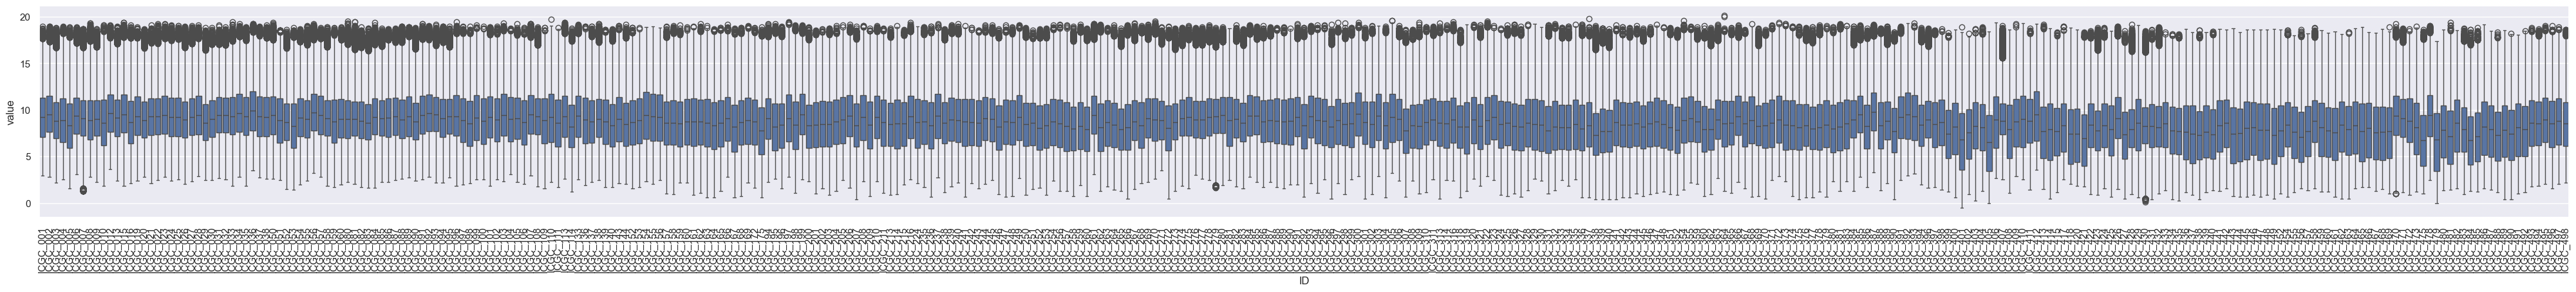

In [96]:
import seaborn as sns

sns.set(rc={'figure.figsize':(50.7,4.27)})
sns.boxplot( x = "ID", y = "value", data = merged_df_m )
plt.xticks(rotation=90)
plt.savefig("Avg_Exp_FPKM_No_Colr.png")


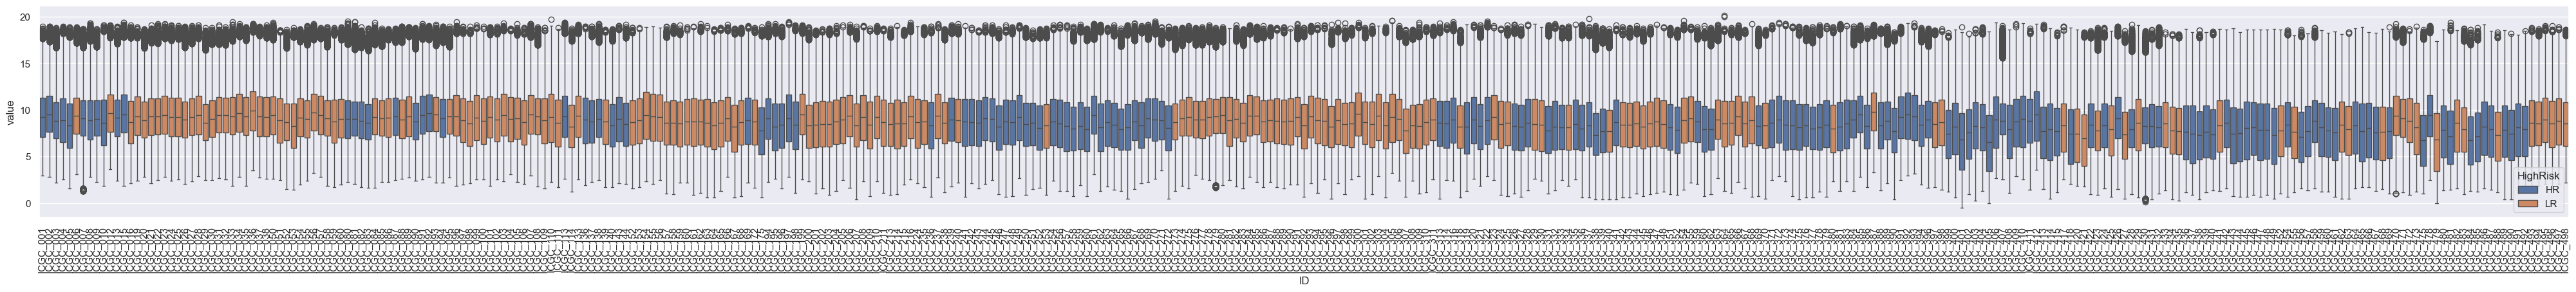

In [98]:
import seaborn as sns

sns.set(rc={'figure.figsize':(50.7,4.27)})
sns.boxplot( x = "ID", y = "value", hue = "HighRisk" , data = merged_df_m )
plt.xticks(rotation=90)
plt.savefig("Avg_Exp_FPKM_Col_by_HR.png")


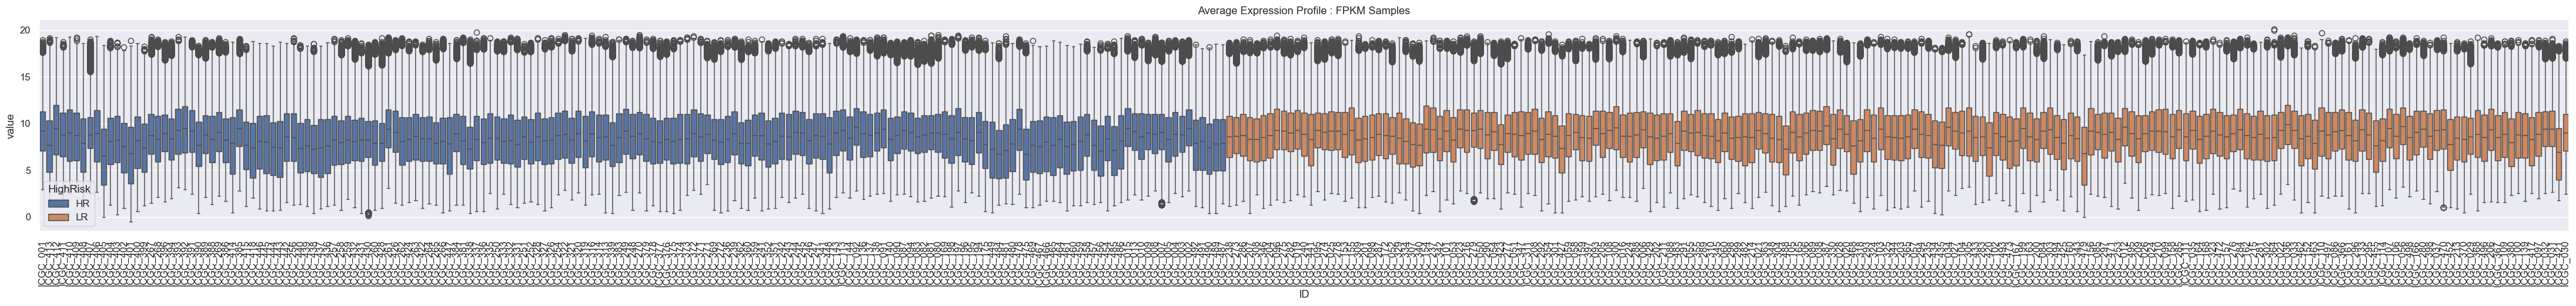

In [99]:
merged_df_m_HRord = merged_df_m.sort_values(by = "HighRisk")

sns.set(rc={'figure.figsize':(50.7,4.27)})
sns.boxplot( x = "ID", y = "value", hue = "HighRisk" , data = merged_df_m_HRord ).set(title='Average Expression Profile : FPKM Samples')
plt.xticks(rotation=90)
plt.savefig("Avg_Exp_Ord_by_HR.png")

#### Data Imputation : FPKM Data


In [32]:
df_common_fpkm.isna().sum() 

ID
Reporter.Identifier    4471
ICGC_056               5750
ICGC_458               5750
ICGC_327               5760
ICGC_460               5738
                       ... 
ICGC_133               5743
ICGC_166               5771
ICGC_086               5759
ICGC_006               5753
ICGC_268               5749
Length: 374, dtype: int64

In [33]:
merged_df

,Gender,Age,clinico.genetic.subgroup,MYCN.status,INSS.Stage,HighRisk,Progression,DeathFromDisease,ID,NaN,...,3319.0,34832.0,24669.0,33950.0,39350.0,22435.0,17350.0,28875.0,8993.0,32006.0
ID,,,,,,,,,,,,,,,,,,,,,
ICGC_001,M,987.0,ST4,1,4,HR,1,1,ICGC_001,14.99,...,7.33,9.11,13.37,6.02,7.89,10.35,17.05,5.30,13.91,14.54
ICGC_002,M,1808.0,ST4,1,4,HR,1,1,ICGC_002,14.94,...,7.94,9.95,NaN,8.32,NaN,10.33,16.62,6.84,13.57,NaN
ICGC_003,F,625.0,MNA,Amp,4,HR,1,1,ICGC_003,12.48,...,8.40,7.51,10.85,6.67,7.84,9.81,17.45,5.29,NaN,14.33
ICGC_004,F,335.0,MNA,Amp,2b,HR,0,0,ICGC_004,14.63,...,NaN,8.54,10.04,7.28,8.20,10.36,16.72,5.33,13.84,14.76
ICGC_005,F,536.0,MNA,Amp,4,HR,1,1,ICGC_005,11.89,...,6.65,8.34,11.10,7.21,7.41,9.65,16.93,4.81,13.22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICGC_494,M,56.0,ST1,1,1,LR,0,0,ICGC_494,13.00,...,9.04,9.09,12.00,6.13,7.29,NaN,16.83,4.19,13.50,13.82
ICGC_495,M,163.0,ST1,1,1,LR,0,0,ICGC_495,13.79,...,8.79,9.57,12.67,7.41,8.20,10.09,17.16,6.85,NaN,14.82
ICGC_496,M,132.0,ST1,1,1,LR,1,0,ICGC_496,14.70,...,7.23,9.17,11.65,7.19,9.19,9.68,17.24,4.99,13.99,14.17


In [11]:
# numeric_features = df_common_fpkm.index
# merged_numeric_df = merged_df[numeric_features]



Index(['1/2-SBSRNA4', 'A1BG', 'A1BG-AS1', 'A1CF', 'A2LD1', 'A2M', 'A2ML1',
       'A2MP1', 'A4GALT', 'A4GNT',
       ...
       'ZWILCH', 'ZWINT', 'Unnamed: 23145', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B',
       'Unnamed: 23150', 'ZZEF1', 'ZZZ3'],
      dtype='object', length=23146)

In [34]:
merged_df.shape[1]

44717

In [35]:
# we delete columns that have no values at all
merged_df = merged_df.dropna(axis=1, how='all')


In [36]:
## Separate Numeric and Categorical Features 
numeric_features = merged_df.columns[9:merged_df.shape[1]].to_list()
numeric_features = [x for x in numeric_features if str(x) != 'nan']
len(numeric_features)
#numeric_features.append
merged_sub_df = merged_df[ numeric_features ]
merged_sub_df

,27262.0,3180.0,41426.0,37033.0,6190.0,21664.0,10745.0,13510.0,7298.0,18206.0,...,3319.0,34832.0,24669.0,33950.0,39350.0,22435.0,17350.0,28875.0,8993.0,32006.0
ID,,,,,,,,,,,,,,,,,,,,,
ICGC_001,9.20,5.06,7.45,6.74,NaN,12.14,3.04,7.85,17.86,3.10,...,7.33,9.11,13.37,6.02,7.89,10.35,17.05,5.30,13.91,14.54
ICGC_002,10.41,5.26,8.68,6.63,4.05,12.36,4.10,7.58,17.78,5.93,...,7.94,9.95,NaN,8.32,NaN,10.33,16.62,6.84,13.57,NaN
ICGC_003,9.27,6.45,6.30,6.75,4.91,11.72,4.27,7.82,18.19,6.88,...,8.40,7.51,10.85,6.67,7.84,9.81,17.45,5.29,NaN,14.33
ICGC_004,8.83,2.89,7.30,6.20,3.00,11.31,4.12,7.01,18.22,6.78,...,NaN,8.54,10.04,7.28,8.20,10.36,16.72,5.33,13.84,14.76
ICGC_005,NaN,2.00,6.26,6.57,NaN,10.90,3.10,6.50,18.15,6.65,...,6.65,8.34,11.10,7.21,7.41,9.65,16.93,4.81,13.22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICGC_494,7.76,2.07,6.38,7.16,2.20,11.45,3.45,6.77,17.82,1.89,...,9.04,9.09,12.00,6.13,7.29,NaN,16.83,4.19,13.50,13.82
ICGC_495,8.56,2.26,7.49,7.07,2.41,12.18,2.29,NaN,17.92,6.02,...,8.79,9.57,12.67,7.41,8.20,10.09,17.16,6.85,NaN,14.82
ICGC_496,7.74,2.29,6.77,5.07,2.38,11.94,NaN,6.42,17.99,6.71,...,7.23,9.17,11.65,7.19,9.19,9.68,17.24,4.99,13.99,14.17


In [37]:
#duplicates = merged_sub_df.columns[merged_sub_df.columns.duplicated(keep = False)]
#print(len(duplicates))

print(numeric_features)


[27262.0, 3180.0, 41426.0, 37033.0, 6190.0, 21664.0, 10745.0, 13510.0, 7298.0, 18206.0, 12166.0, 43382.0, 23098.0, 39007.0, 27261.0, 41425.0, 33843.0, 6191.0, 28910.0, 10744.0, 37034.0, 21665.0, 1034.0, 23902.0, 28919.0, 7857.0, 18205.0, 23417.0, 2627.0, 43380.0, 41190.0, 23097.0, 16801.0, 3776.0, 28487.0, 22779.0, 23092.0, 41752.0, 41428.0, 33844.0, 1037.0, 28911.0, 35650.0, 18201.0, 40938.0, 16809.0, 5184.0, 12459.0, 6193.0, 7295.0, 21660.0, 12165.0, 6299.0, 28914.0, 27263.0, 3779.0, 23091.0, 12458.0, 8761.0, 37032.0, 41427.0, 22389.0, 1038.0, 40937.0, 35652.0, 33418.0, 9899.0, 4120.0, 16808.0, 10743.0, 23903.0, 18207.0, 2629.0, 43381.0, 21661.0, 7870.0, 23418.0, 25591.0, 43788.0, 39015.0, 3778.0, 13508.0, 41753.0, 40936.0, 5183.0, 7296.0, 8760.0, 35654.0, 28459.0, 23900.0, 10729.0, 27266.0, 8488.0, 6298.0, 4376.0, 18912.0, 25590.0, 39014.0, 12153.0, 36559.0, 28925.0, 22383.0, 41429.0, 40935.0, 15914.0, 6195.0, 33414.0, 16803.0, 33851.0, 27265.0, 4121.0, 8487.0, 6295.0, 3772.0, 27260

In [38]:
#numeric_features
print(merged_sub_df[32006])

ID
ICGC_001    14.54
ICGC_002      NaN
ICGC_003    14.33
ICGC_004    14.76
ICGC_005      NaN
            ...  
ICGC_494    13.82
ICGC_495    14.82
ICGC_496    14.17
ICGC_497    14.65
ICGC_498    14.22
Name: 32006.0, Length: 373, dtype: float64


In [329]:
#numeric_features = numeric_features[:-1]
#del(merged_sub_df["ID"])

#merged_sub_df.shape






In [39]:
numeric_features = merged_sub_df.select_dtypes(exclude="object").columns

print(numeric_features)

print(merged_sub_df.columns)


Index([27262.0,  3180.0, 41426.0, 37033.0,  6190.0, 21664.0, 10745.0, 13510.0,
        7298.0, 18206.0,
       ...
        3319.0, 34832.0, 24669.0, 33950.0, 39350.0, 22435.0, 17350.0, 28875.0,
        8993.0, 32006.0],
      dtype='object', length=38945)
Index([27262.0,  3180.0, 41426.0, 37033.0,  6190.0, 21664.0, 10745.0, 13510.0,
        7298.0, 18206.0,
       ...
        3319.0, 34832.0, 24669.0, 33950.0, 39350.0, 22435.0, 17350.0, 28875.0,
        8993.0, 32006.0],
      dtype='object', length=38945)


In [322]:
#we delete some columns without any values, because we can't compute them if we have no values



ID
ICGC_001    9.55
ICGC_002    8.06
ICGC_003    7.45
ICGC_004    7.60
ICGC_005    7.47
            ... 
ICGC_494    8.15
ICGC_495    8.78
ICGC_496    7.60
ICGC_497    8.11
ICGC_498    9.04
Name: 16.0, Length: 373, dtype: float64


In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer

## Numeical Features
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
     transformers=[
         ('numerical_imputer', numeric_transformer, numeric_features)])


num_imputer = Pipeline(steps=[('preprocessor', preprocessor)])
merged_df_imputed = num_imputer.fit_transform(merged_sub_df)


print("Shape of merged_df_imputed:", merged_df_imputed.shape)
print("Length of numeric_features:", len(numeric_features))
merged_df_imputed_df = pd.DataFrame( merged_df_imputed, columns= numeric_features )
merged_df_imputed_df

merged_df_imputed_df.to_csv("Merged_Imputed_FPKM.csv", sep = ",")



Shape of merged_df_imputed: (373, 38945)
Length of numeric_features: 38945


#### Simple Data Pre-processing 

1. Normalize the data
2. Remove features with little or no variance

In [41]:
## Data Normalization

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer


def normalize(df, scaler = StandardScaler()):
    df.columns = df.columns.map(str)
    numeric_features = list(df.select_dtypes(float).columns)
    numeric_transformer = Pipeline(steps=[ ('scaler', scaler)])
    preprocessor = ColumnTransformer(transformers = [('num', numeric_transformer, numeric_features)])
    normalizer = Pipeline(steps=[('preprocessor', preprocessor)])
    df_norm = pd.DataFrame(normalizer.fit_transform(df[numeric_features]), columns = numeric_features, index=df.index)
    return df_norm


merged_norm_df = normalize(merged_df_imputed_df, scaler = StandardScaler())

merged_norm_df.to_csv("Merged_Impute_Norm_FPKM.csv", sep = ",")


In [ ]:
#import pandas as pd
#merged_corF_df = pd.read_csv("Merged_Clinical_and_FPKM_Data.csv", sep = ",") 
#merged_corF_df

### Data Pre-processing

#### Variance Thresholding ####



In [42]:
## VarianceThreshold

from sklearn.feature_selection import VarianceThreshold
def variance_threshold(df_norm, thr):
    var_thresholder = VarianceThreshold(threshold = thr)
    var_thresholder.fit(df_norm)
    new_columns = var_thresholder.get_support()
    return df_norm.iloc[:, new_columns]



merged_impute_vt_norm_df = variance_threshold(merged_norm_df, thr = 0.05) 

print(merged_norm_df.shape)
print(merged_impute_vt_norm_df.shape)
#merged_impute_vt_norm_df.to_csv("Merged_Imputed_Norm_VT_FPKM.csv", sep = ",")


(373, 38945)
(373, 38945)


In [ ]:
## Drop features that are highly correlated 

def correlation_drop(df_norm, corthres):
    cor_matrix = df_norm.corr().abs()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
    to_drop = []
    for column in upper_tri.columns:
        if any(upper_tri[column] > corthres) and column not in to_drop:
            to_drop.append(column)    
    df_norm = df_norm[df_norm.columns[~df_norm.columns.isin(to_drop)]]
    return df_norm


merged_corF_df = correlation_drop(merged_impute_vt_df, corthres = 0.95 ) 

#merged_corF_df.to_csv("Merged_Imputed_VT_corF_FPKM.csv", sep = ",")

In [43]:
## We have decided to exclude the above COR Filter Step
merged_corF_df = merged_impute_vt_norm_df


### Separating the Train and Test Data 
1. We will start with Death from Disease as an indicator. 



In [44]:

### Feature Matrix
X_all = merged_corF_df

### target label  
y_all = merged_df["DeathFromDisease"]
clinical_info = merged_df.iloc[:, 0:8]

print(clinical_info)
clinical_info.to_csv("Clinical_Info.csv", sep =",")

         Gender     Age clinico.genetic.subgroup MYCN.status INSS.Stage  \
ID                                                                        
ICGC_001      M   987.0                      ST4           1          4   
ICGC_002      M  1808.0                      ST4           1          4   
ICGC_003      F   625.0                      MNA         Amp          4   
ICGC_004      F   335.0                      MNA         Amp         2b   
ICGC_005      F   536.0                      MNA         Amp          4   
...         ...     ...                      ...         ...        ...   
ICGC_494      M    56.0                      ST1           1          1   
ICGC_495      M   163.0                      ST1           1          1   
ICGC_496      M   132.0                      ST1           1          1   
ICGC_497      F   379.0                      ST1           1          1   
ICGC_498      F   530.0                      ST1           1          1   

         HighRisk  Progr

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler


X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

X_train.to_csv("X_Train.csv", sep = ",")
X_test.to_csv("X_Test.csv", sep = ",")
y_train.to_csv("y_train.csv", sep = ",")
y_test.to_csv("y_test.csv", sep = ",")



In [46]:
X_train.shape

(261, 38945)

In [51]:
### Data Normalization 

# Initialize a new StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train))
X_train_norm.columns = X_train.columns

# Use the same scaler to transform the test data
X_test_norm = pd.DataFrame(scaler.transform(X_test))
X_test_norm.columns = X_test.columns

#print(X_train.iloc[:,0])
#print(X_train_norm.iloc[:,0])

X_train_norm.to_csv("X_Train_norm.csv", sep = ",")
X_test_norm.to_csv("X_Test_norm.csv", sep = ",")

In [52]:
X_train_norm.shape

(261, 38945)

#### Unsupervised Analysis 

1. PCA
2. K-means
3. K-means with PCA

In [47]:
print(y_all.unique)

<bound method Series.unique of ID
ICGC_001    1
ICGC_002    1
ICGC_003    1
ICGC_004    0
ICGC_005    1
           ..
ICGC_494    0
ICGC_495    0
ICGC_496    0
ICGC_497    0
ICGC_498    0
Name: DeathFromDisease, Length: 373, dtype: int64>


In [48]:
y = [0,1]
y_values = y_train.values


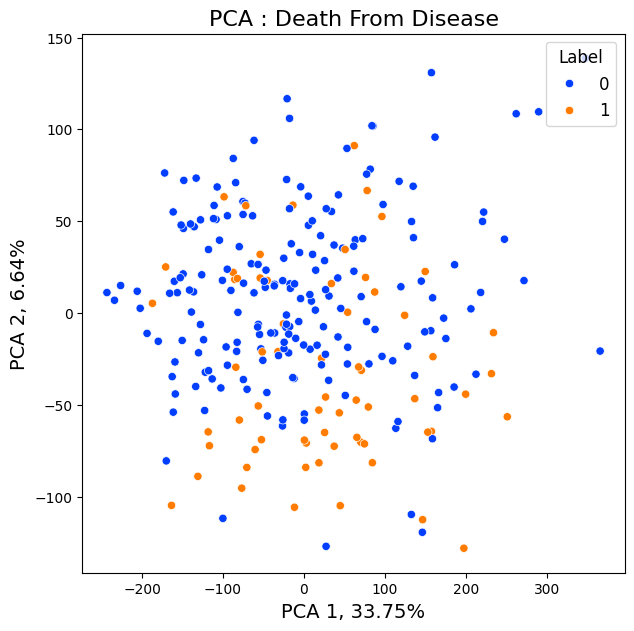

In [95]:
### Merge the data back again for plotting. 

from sklearn.decomposition import PCA

colorPalette = 'bright'
colors = dict(zip( y ,sns.color_palette(colorPalette)))
ticks_ = 10
legend_ = 12
axis_ = 14 
title_ = 16 
width = 30
height = 10

def pca_plot( df = None, target = None, tag = None ):
    pca = PCA(n_components=2)
    pca.fit(df)
    pca_variance = pca.explained_variance_ratio_.tolist()
    pca_variance[0] = pca_variance[0]*100
    pca_variance[1] = pca_variance[1]*100
    pca1lab = "PCA 1" + ", " + str(round(pca_variance[0], 2)) + "%"
    pca2lab = "PCA 2" + ", " + str(round(pca_variance[1], 2)) + "%"
    df_pca = pd.DataFrame(pca.transform(df), index=df.index, columns=['pca_1','pca_2'])
    plt.figure(figsize = (7, 7))
    ax = sns.scatterplot(x=df_pca.iloc[:,0], y=df_pca.iloc[:,1], data=df,hue=target, palette=colors, edgecolor = 'white')
    plt.xlabel(pca1lab, fontsize = axis_)
    plt.ylabel(pca2lab, fontsize = axis_)
    plt.title("PCA : " + tag , fontsize = title_)
    plt.legend(title='Label', loc='upper right', fontsize = legend_, title_fontsize = legend_)
    plt.xticks(fontsize = ticks_)
    plt.yticks(fontsize = ticks_)
    plt.show(block = False)
    return df_pca


df_pca = pca_plot( df = X_train_norm, target = y_values, tag = "Death From Disease" )

PCA()


##### K-means clustering 

In [150]:
from sklearn.cluster import KMeans
from sklearn import metrics

kmeans_all = KMeans(n_clusters= k, init='random').fit(X_train_norm)
kmeans_all

c:\Users\RTX 3070 TI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init='random', n_clusters=2)

c:\Users\RTX 3070 TI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\RTX 3070 TI\AppData\Local\Temp\ipykernel_21344\1820584118.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_kmeans['cluster_k{}'.format(k)] = kmeans.labels_
c:\Users\RTX 3070 TI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_p

,Distortion Score
k,
2,259.912656
3,170.496039


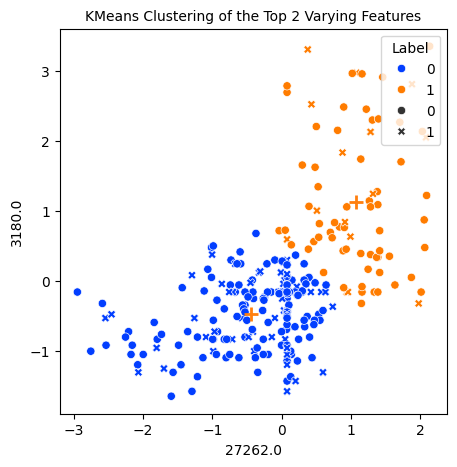

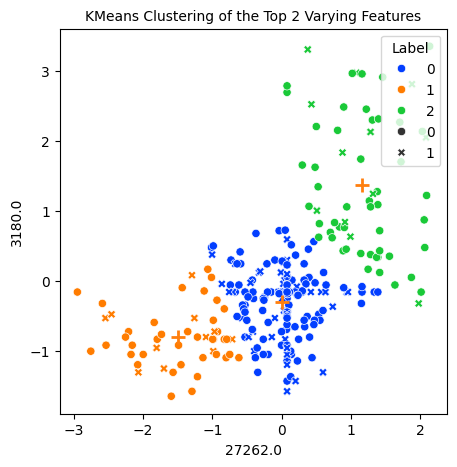

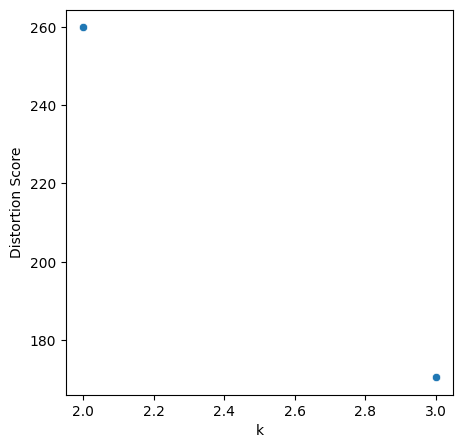

In [54]:
from sklearn.cluster import KMeans
from sklearn import metrics

X_kmeans = X_train_norm.iloc[:, :2]

kmeans_distortion_score = {}
kmeans_silhouette_score = {}

for k in range(2,4):
    kmeans = KMeans(n_clusters=k, init='random').fit(X_kmeans.iloc[:,:2])
    kmeans_centroids_plt = pd.DataFrame(kmeans.cluster_centers_, columns = X_kmeans.columns.values.tolist()[:2])
    X_kmeans['cluster_k{}'.format(k)] = kmeans.labels_
    kmeans_distortion_score[k] = kmeans.inertia_
    colorPalette = 'bright'
    colors = dict(zip(X_kmeans['cluster_k{}'.format(k)].unique(),sns.color_palette(colorPalette)))
    plt.figure(figsize = (5, 5))
    ax = sns.scatterplot(x=X_kmeans.iloc[:,0], y=X_kmeans.iloc[:,1], hue='cluster_k{}'.format(k), palette=colors, data=X_kmeans, style = y_values, edgecolor='white')
    ax = sns.scatterplot(x=kmeans_centroids_plt.iloc[:,0], y=kmeans_centroids_plt.iloc[:,1], data=kmeans_centroids_plt, linewidth=2.0, marker='+', s=100)
    plt.title("KMeans Clustering of the Top 2 Varying Features", fontsize = 10)
    plt.legend(title='Label', loc='upper right', fontsize = 10)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
df_scores = pd.DataFrame()
df_scores['Distortion Score'] = pd.Series(kmeans_distortion_score)
df_scores.index.name='k'

fig = plt.figure(figsize=(5,5))
ax = sns.scatterplot(x='k', y='Distortion Score', data=df_scores)

df_scores

#### Combined PCA and K Means


In [55]:
#del(merged_df["ID"])
merged_df


,Gender,Age,clinico.genetic.subgroup,MYCN.status,INSS.Stage,HighRisk,Progression,DeathFromDisease,ID,NaN,...,3319.0,34832.0,24669.0,33950.0,39350.0,22435.0,17350.0,28875.0,8993.0,32006.0
ID,,,,,,,,,,,,,,,,,,,,,
ICGC_001,M,987.0,ST4,1,4,HR,1,1,ICGC_001,14.99,...,7.33,9.11,13.37,6.02,7.89,10.35,17.05,5.30,13.91,14.54
ICGC_002,M,1808.0,ST4,1,4,HR,1,1,ICGC_002,14.94,...,7.94,9.95,NaN,8.32,NaN,10.33,16.62,6.84,13.57,NaN
ICGC_003,F,625.0,MNA,Amp,4,HR,1,1,ICGC_003,12.48,...,8.40,7.51,10.85,6.67,7.84,9.81,17.45,5.29,NaN,14.33
ICGC_004,F,335.0,MNA,Amp,2b,HR,0,0,ICGC_004,14.63,...,NaN,8.54,10.04,7.28,8.20,10.36,16.72,5.33,13.84,14.76
ICGC_005,F,536.0,MNA,Amp,4,HR,1,1,ICGC_005,11.89,...,6.65,8.34,11.10,7.21,7.41,9.65,16.93,4.81,13.22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICGC_494,M,56.0,ST1,1,1,LR,0,0,ICGC_494,13.00,...,9.04,9.09,12.00,6.13,7.29,NaN,16.83,4.19,13.50,13.82
ICGC_495,M,163.0,ST1,1,1,LR,0,0,ICGC_495,13.79,...,8.79,9.57,12.67,7.41,8.20,10.09,17.16,6.85,NaN,14.82
ICGC_496,M,132.0,ST1,1,1,LR,1,0,ICGC_496,14.70,...,7.23,9.17,11.65,7.19,9.19,9.68,17.24,4.99,13.99,14.17


In [80]:
print(y_train.values)

[0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0]


In [57]:
## Extract the relevant clinical information from the Merged DataFrame

df_common_patient_info_train = merged_df.iloc[ X_train.index, 0:8 ]
df_common_patient_info_test = merged_df.iloc[ X_test.index, 0:8 ]
df_common_patient_info_test

,Gender,Age,clinico.genetic.subgroup,MYCN.status,INSS.Stage,HighRisk,Progression,DeathFromDisease
ID,,,,,,,,
ICGC_447,M,1275.0,ST4,1,4,HR,1,1
ICGC_038,F,466.0,ST1,1,1,LR,0,0
ICGC_020,M,497.0,ST1,1,1,LR,0,0
ICGC_434,M,309.0,ST4,1,4,LR,0,0
ICGC_092,M,933.0,ST4,1,4,HR,1,1
...,...,...,...,...,...,...,...,...
ICGC_494,M,56.0,ST1,1,1,LR,0,0
ICGC_421,M,87.0,ST4S,1,4S,LR,0,0
ICGC_457,M,960.0,MNA,Amp,4,HR,1,1


In [94]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Apply kmeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_norm)

# Get cluster assignments for each data point
labels = kmeans.labels_

df_common_patient_info_train["KMeans_Label"] = labels

pd.DataFrame(pd.crosstab( df_common_patient_info_train["DeathFromDisease"], df_common_patient_info_train["KMeans_Label"] ))


c:\Users\RTX 3070 TI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans_Label,0,1
DeathFromDisease,,
0,71,125
1,36,29


In [70]:
print(kmeans.labels_)

[0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1
 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1
 1 0]


In [112]:
y_values = y_train.values

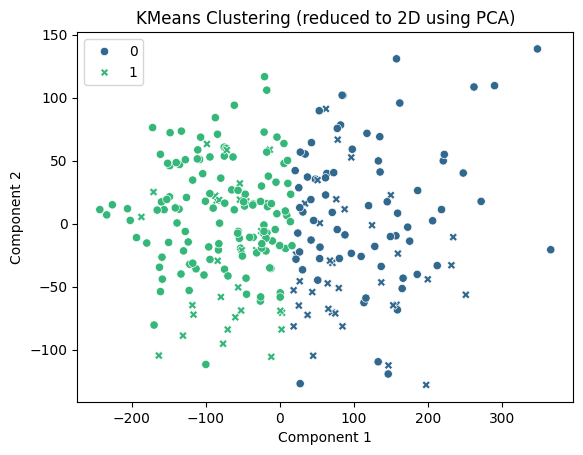

In [141]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_temp_2D = pca.fit_transform(X_train_norm)

# Convert the NumPy array to a DataFrame
X_train_temp_2D_df = pd.DataFrame(X_train_temp_2D, columns=['Component 1', 'Component 2'])

# Assuming you have cluster labels in a variable named 'cluster_labels'
# You can use the 'hue' parameter to color the points based on the cluster labels
sns.scatterplot(x='Component 1', y='Component 2', hue=labels, data=X_train_temp_2D_df, palette="viridis", style= y_values)

plt.title('KMeans Clustering (reduced to 2D using PCA)')
plt.show()

### Feature Selection [ supervised Feature Selection ]

We will use two feature selection methods.
SelectKBest [ We can select 20 , 30 40 features] 
SelectPercentile [ We can select 1% or 2% or 5% of the top features ]


In [142]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, SelectPercentile
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
X_train_norm

,27262.0,3180.0,41426.0,37033.0,6190.0,21664.0,10745.0,13510.0,7298.0,18206.0,...,3319.0,34832.0,24669.0,33950.0,39350.0,22435.0,17350.0,28875.0,8993.0,32006.0
0,-0.149353,-0.157672,0.067054,0.840343,-1.091675,0.289737,-1.142259,0.334726,0.051294,-0.082145,...,-1.220919,0.058756,0.761180,-0.994938,-0.396545,-0.265656,0.844919,0.038240,0.151163,0.024686
1,0.079585,0.230265,0.381505,1.321070,0.235344,-0.484963,-0.003748,0.583124,-0.570427,0.531473,...,0.351700,0.501539,0.008956,1.104554,0.673646,0.550449,0.209971,1.022491,0.536701,-0.677879
2,-0.827364,-0.832683,-0.247396,1.380236,-0.938924,0.729907,2.473716,-1.611055,-0.819116,0.520984,...,-0.366433,0.868725,1.650906,-1.669387,0.601700,-3.323328,-0.074660,-0.124075,-1.626599,1.772530
3,0.889676,0.431993,0.302892,1.417215,0.674501,0.307344,0.196694,1.266217,0.341431,1.291941,...,0.469874,0.555537,0.858241,-0.157317,0.664653,1.344790,0.319445,0.780745,1.029334,1.138508
4,0.836844,0.773378,0.686129,1.779609,1.056377,-2.016757,0.910268,-0.369067,-1.503009,-1.125822,...,1.606159,-0.762012,0.243520,0.821721,0.691632,0.104311,-2.067083,0.918886,-1.519505,-1.363308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0.088391,-0.180948,0.391331,0.603678,-0.060610,0.043241,-0.412650,0.138078,0.279258,0.547207,...,0.106262,-0.286830,1.295016,-0.135561,0.394857,0.474279,0.034813,0.172927,-0.191538,0.007550
257,-1.214799,-1.368037,-0.571674,0.034202,-1.454457,-1.752655,-0.669215,-1.228109,0.590119,-0.365354,...,-0.884579,-1.604380,-0.298404,-0.472785,-1.475729,-0.592098,-1.256977,-1.173943,0.151163,0.024686
258,2.034370,2.138917,0.843354,1.054821,0.750876,2.244094,2.922706,1.845811,1.149668,1.270963,...,0.733492,-0.049239,1.578110,1.517926,1.420082,1.921504,1.961552,1.789171,1.714736,0.864337
259,0.079585,-0.157672,0.037574,0.034202,2.173364,0.536232,1.078639,0.386476,-0.798392,0.253509,...,1.597069,0.965921,-0.880770,0.571522,0.012646,0.126074,-0.512555,0.345603,0.151163,0.024686


In [144]:
## Leave a backup of the data

X_train_norm_bk = X_train_norm
y_train_bk = y_train

X_test_norm_bkup = X_test_norm
y_test_bkup = y_test


In [149]:
# Define target and features
y =  y_train
X = X_train_norm

y

ID
ICGC_302    0
ICGC_024    0
ICGC_482    0
ICGC_133    0
ICGC_273    0
           ..
ICGC_106    0
ICGC_175    0
ICGC_387    0
ICGC_471    0
ICGC_167    0
Name: DeathFromDisease, Length: 261, dtype: int64

In [150]:
X = X.reset_index( drop = True )
y = y.reset_index( drop = True )


In [152]:
y

0      0
1      0
2      0
3      0
4      0
      ..
256    0
257    0
258    0
259    0
260    0
Name: DeathFromDisease, Length: 261, dtype: int64

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


## Specify the number of features
top_n_features = 100

# Set up cross-validation
kf = KFold(n_splits=5)

# Initialize list to hold common features from each fold
common_features = []

## We will use a  RandomForestClassifier to check the performance. 
rf = RandomForestClassifier()

# Iterate over each split
for train_index, test_index in kf.split(X):
    X_train_temp, X_test_temp = X.iloc[train_index], X.iloc[test_index]
    y_train_temp, y_test_temp = y[train_index], y[test_index]
    
    # Initialize feature selectors
    selector_kbest = SelectKBest(score_func=f_classif, k=top_n_features)  
    selector_percentile = SelectPercentile(score_func=f_classif, percentile=1)
    
    # Fit and transform the data
    X_new_kbest = selector_kbest.fit_transform(X_train_temp, y_train_temp)
    X_new_percentile = selector_percentile.fit_transform(X_train_temp, y_train_temp)
    
    # Get the selected features
    selected_features_kbest = X.columns[selector_kbest.get_support()]
    selected_features_percentile = X.columns[selector_percentile.get_support()]

    # Get the common features and add to the list
    common_features_fold = set(selected_features_kbest) & set(selected_features_percentile)
    print(f"Common features in this fold : {common_features_fold}")

    common_features.append(common_features_fold)
    
    # Train the model on the selected features and compute the accuracy
    X_train_selected = X_train_temp[list(common_features_fold)]
    X_test_selected = X_test_temp[list(common_features_fold)]
    rf.fit(X_train_selected, y_train_temp)
    y_pred = rf.predict(X_test_selected)
    accuracy = accuracy_score(y_test_temp, y_pred)
    print(f'Accuracy for this fold: {accuracy}')
    
    # Get the common features and add to the list
    common_features.append(set(selected_features_kbest) & set(selected_features_percentile))

# Get the intersection of common features from all folds
final_common_features = set.intersection(*map(set, common_features))

print(f"Final common features: {final_common_features}")

#This code performs the following tasks:

# It uses cross-validation to assess the common features selected by two different feature selection methods (SelectKBest and SelectPercentile) in a machine learning pipeline.

# For each fold in the cross-validation:
# a. It applies feature selection on the training data using both SelectKBest and SelectPercentile methods.
# b. It identifies the common features selected by both methods.
# c. Trains a RandomForestClassifier model on the common features and evaluates its accuracy on the test data.

# It collects the common features from each fold and stores them in a list.

# After processing all folds, it computes the final set of common features by finding the intersection of common features from all folds.

# In summary, the code finds common features selected by two different feature selection methods across multiple cross-validation folds and identifies the final set of features that are consistently selected.


Common features in this fold : {'42292.0', '6623.0', '7389.0', '15178.0', '5831.0', '12298.0', '11060.0', '35729.0', '20587.0', '37245.0', '378.0', '5853.0', '44212.0', '12682.0', '1826.0', '19091.0', '13473.0', '5915.0', '4881.0', '7445.0', '18785.0', '39388.0', '9875.0', '37442.0', '10219.0', '20236.0', '3621.0', '14608.0', '41018.0', '38304.0', '37771.0', '36922.0', '4359.0', '970.0', '30891.0', '11375.0', '546.0', '3150.0', '7407.0', '30584.0', '22194.0', '36725.0', '7195.0', '33259.0', '5110.0', '24608.0', '32921.0', '27761.0', '13539.0', '13209.0', '2248.0', '37177.0', '15799.0', '14307.0', '43710.0', '16295.0', '13955.0', '19437.0', '17520.0', '18912.0', '9638.0', '11986.0', '5626.0', '5985.0', '27947.0', '12149.0', '3543.0', '21331.0', '5296.0', '20995.0', '712.0', '23942.0', '28279.0', '1339.0', '43315.0', '20800.0', '24130.0', '30444.0', '35471.0', '28655.0', '14687.0', '18719.0', '26470.0', '13346.0', '33477.0', '20666.0', '33020.0', '41140.0', '19614.0', '11372.0', '8237.0'

In [197]:
X_selected = X[list(common_features_fold)]
rf.fit(X_selected, y)
y_pred = rf.predict(X_selected)
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy on All Train Data: {accuracy}')
#This code fits a RandomForestClassifier model to the entire dataset using the common features selected in the cross-validation process
# and then calculates the accuracy of the model on the full training dataset.


#An accuracy of 1.0 (100%) 
# indicates that the RandomForestClassifier model correctly predicts all the training data's target values, 
# suggesting that the model is performing perfectly on the training dataset.
# perfectly on the training dataset. However, it's essential to assess the model's performance on unseen or test data to evaluate its generalization capability.












Accuracy on All Train Data: 1.0


In [154]:
# Visualize feature importance

# Use the selector fitted on the whole dataset for visualization
selector_kbest.fit(X, y)
selector_percentile.fit(X, y)

# Get feature importances
importances_kbest = selector_kbest.scores_
importances_percentile = selector_percentile.scores_

# Convert to DataFrame for easier plotting
df_importances_kbest = pd.DataFrame({'Feature': X.columns, 'Importance': importances_kbest})
df_importances_percentile = pd.DataFrame({'Feature': X.columns, 'Importance': importances_percentile})

# Sort by importance
df_importances_kbest = df_importances_kbest.sort_values(by='Importance', ascending=False)
df_importances_percentile = df_importances_percentile.sort_values(by='Importance', ascending=False)

df_importances_kbest

#This code calculates and visualizes the importance of features using two different feature selection methods (SelectKBest and SelectPercentile) on the entire dataset.
# It first fits the selectors to the dataset, computes feature importances, 
# and then creates DataFrames to store the feature names and their respective importance scores.
#  Finally, it sorts the DataFrames by importance in descending order.







,Feature,Importance
22212,4881.0,8.661989e+01
16678,23442.0,8.660437e+01
1417,27947.0,8.282680e+01
25806,32921.0,7.946781e+01
6378,28655.0,7.927248e+01
...,...,...
5930,26271.0,1.434115e-07
19895,42494.0,1.124126e-07
1727,1963.0,7.379169e-08
12782,17711.0,1.247221e-08


In [155]:
aaaa = X.loc[1:3, "4881.0"]
aaaa

1   -0.555748
2   -1.635433
3   -0.319954
Name: 4881.0, dtype: float64

In [206]:
column_index = X.columns.get_loc("4881.0")
print(column_index)

22212


In [156]:
df_importances_percentile

,Feature,Importance
22212,4881.0,8.661989e+01
16678,23442.0,8.660437e+01
1417,27947.0,8.282680e+01
25806,32921.0,7.946781e+01
6378,28655.0,7.927248e+01
...,...,...
5930,26271.0,1.434115e-07
19895,42494.0,1.124126e-07
1727,1963.0,7.379169e-08
12782,17711.0,1.247221e-08


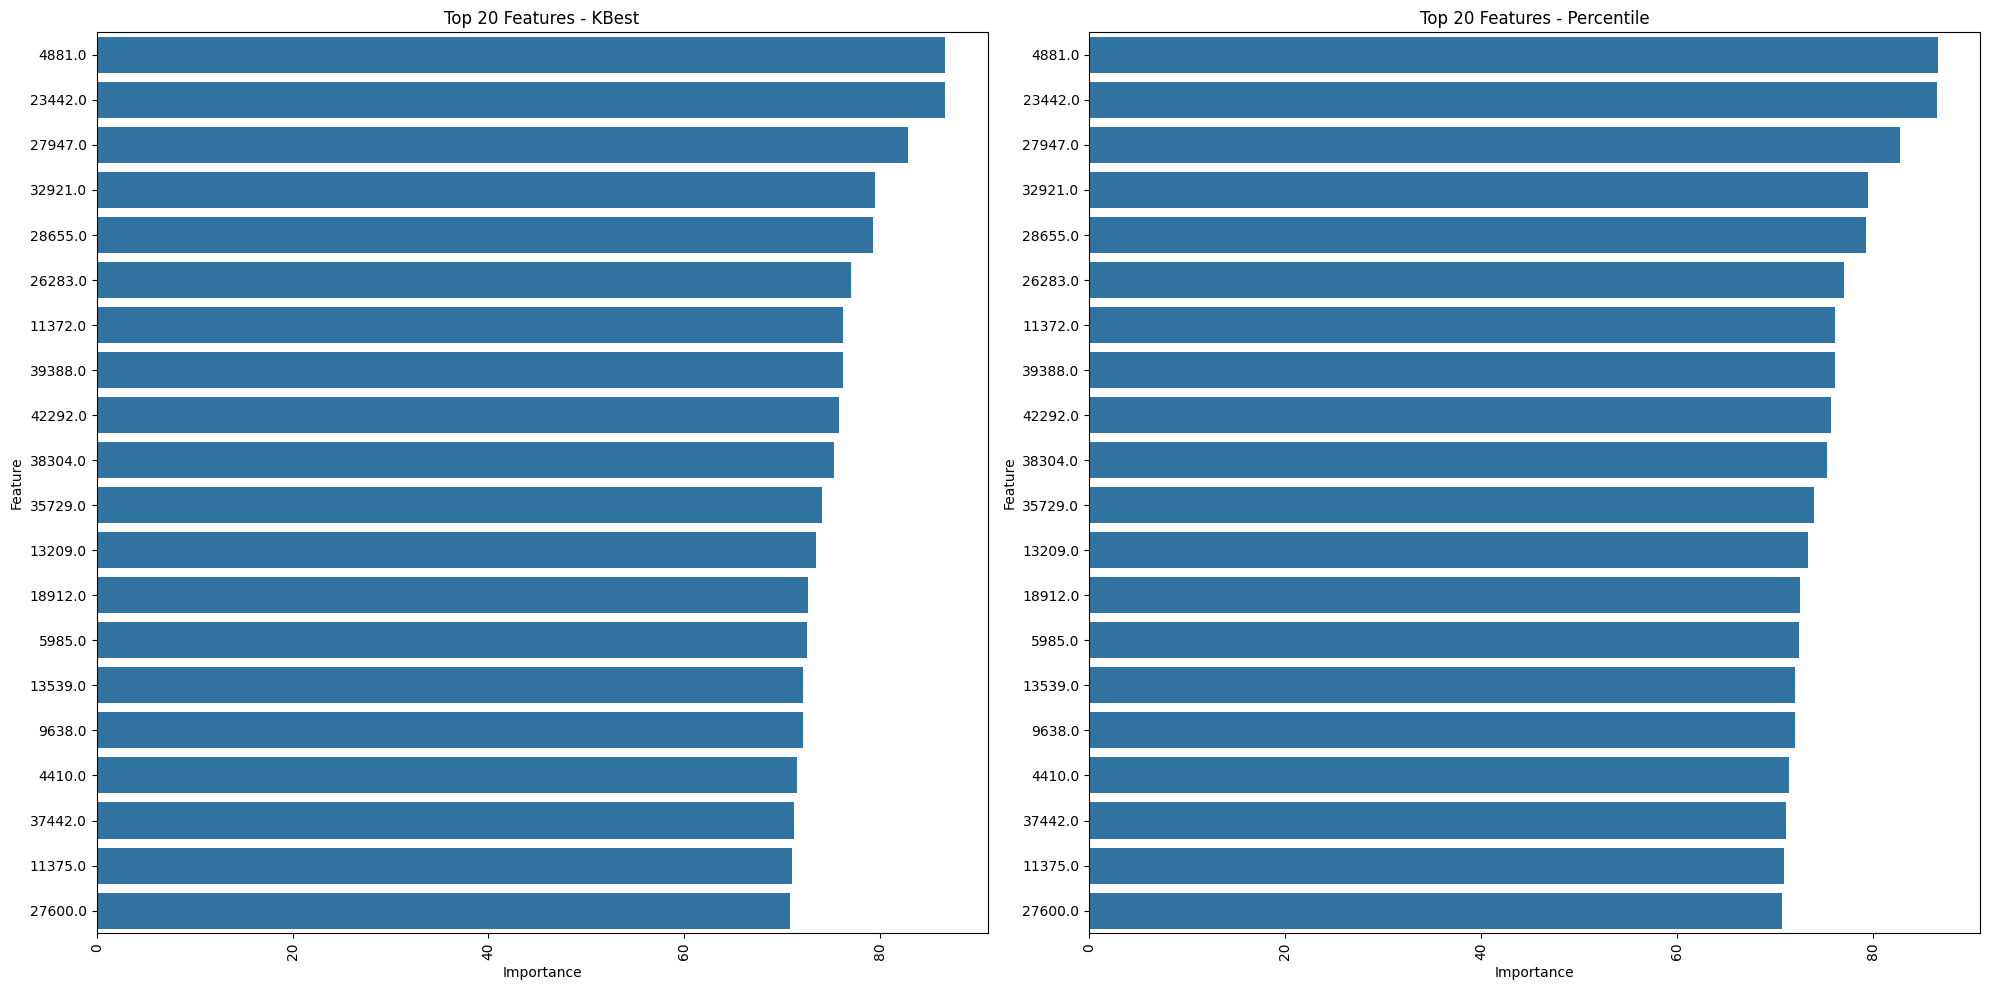

In [157]:

# Plot
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.barplot(data=df_importances_kbest[:20], x='Importance', y='Feature')
plt.title('Top 20 Features - KBest')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.barplot(data=df_importances_percentile[:20], x='Importance', y='Feature')
plt.title('Top 20 Features - Percentile')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


#This code generates a side-by-side comparison of the top 20 most important features selected by two different feature selection methods (SelectKBest and SelectPercentile).
# It creates a horizontal bar plot for each method, showing the importance of these features. 
# The plt.tight_layout() function is used to ensure the subplots are properly spaced, and plt.show() displays the visualization.

In [164]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assume df is your DataFrame
df = pd.read_csv('Clinical_info.csv')

# Create a compound column for stratification
df['compound'] = df['Age'].astype(str) + '_' + df['Gender'].astype(str) + '_' + df['DeathFromDisease'].astype(str)

# Define target and features
y = df['DeathFromDisease']  # Replace 'target' with your target column
X = df.drop(['DeathFromDisease', 'compound'], axis=1)  # Assuming all other columns are features

# Set up cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize list to hold common features from each fold
common_features = []

# Define hyperparameters to test
svm_params = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid']}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

# Initialize models
svm = SVC()
rf = RandomForestClassifier()

# Iterate over each split
for train_index, test_index in skf.split(X, df['compound']): # Now we're splitting based on X and the compound column
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize feature selectors
    selector_kbest = SelectKBest(score_func=f_classif, k=210)  # Adjust 'k' as per your requirements
    selector_percentile = SelectPercentile(score_func=f_classif, percentile=1)
    
    # Fit and transform the data
    X_new_kbest = selector_kbest.fit_transform(X_train, y_train)
    X_new_percentile = selector_percentile.fit_transform(X_train, y_train)
    
    # Get the selected features
    selected_features_kbest = X.columns[selector_kbest.get_support()]
    selected_features_percentile = X.columns[selector_percentile.get_support()]
    
    # Get the common features and add to the list
    common_features_fold = set(selected_features_kbest) & set(selected_features_percentile)
    common_features.append(common_features_fold)

# Get the intersection of common features from all folds
final_common_features = set.intersection(*map(set, common_features))

print(f"Final common features: {final_common_features}")

# Perform hyperparameter tuning on selected features
X_selected = X[list(final_common_features)]

svm_grid_selected = GridSearchCV(svm, svm_params, cv=3)
svm_grid_selected.fit(X_selected, y)

rf_grid_selected = GridSearchCV(rf, rf_params, cv=3)
rf_grid_selected.fit(X_selected, y)

print("Best SVM parameters on selected features: ", svm_grid_selected.best_params_)
print("Best RF parameters on selected features: ", rf_grid_selected.best_params_)

# Perform hyperparameter tuning on all features
svm_grid_all = GridSearchCV(svm, svm_params, cv=3)
svm_grid_all.fit(X, y)

rf_grid_all = GridSearchCV(rf, rf_params, cv=3)
rf_grid_all.fit(X, y)

print("Best SVM parameters on all features: ", svm_grid_all.best_params_)
print("Best RF parameters on all features: ", rf_grid_all.best_params_)


ValueError: n_splits=5 cannot be greater than the number of members in each class.

### Hyper Parameter Tuning  ###

1.Identify the best hyper parameters for the classifer.
2. Stratify based on multiple covariates
3. Train a model with the best hyper parameter with selected features and withour seleted features. 


In [162]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Reload the Train and Test Data

X_train_norm = pd.read_csv("X_Train_norm.csv", sep =",",index_col=0)
X_test_norm = pd.read_csv("X_Test_norm.csv", sep =",",index_col=0)

y_train = pd.read_csv("y_train.csv", sep =",",index_col=0)
y_test = pd.read_csv("y_test.csv", sep =",",index_col=0)

Clinical_Info = pd.read_csv("Clinical_Info.csv", sep =",",index_col=0)


In [172]:
## subset the Clinical Data

Clinical_Info_train = Clinical_Info[  Clinical_Info.index.isin( y_train.index.to_list() ) ]
Clinical_Info_train.to_csv("Clinical_Info_train", sep = ",")
Clinical_Info_test = Clinical_Info[  Clinical_Info.index.isin( y_test.index.to_list() ) ]
Clinical_Info_test.to_csv("Clinical_Info_test", sep = ",")

In [179]:
Clinical_Info_train

,Gender,Age,clinico.genetic.subgroup,MYCN.status,INSS.Stage,HighRisk,Progression,DeathFromDisease
ID,,,,,,,,
ICGC_002,M,1808.0,ST4,1,4,HR,1,1
ICGC_003,F,625.0,MNA,Amp,4,HR,1,1
ICGC_005,F,536.0,MNA,Amp,4,HR,1,1
ICGC_007,M,942.0,ST4,1,4,HR,1,0
ICGC_009,F,217.0,MNA,Amp,4S,HR,0,0
...,...,...,...,...,...,...,...,...
ICGC_492,M,947.0,MNA,Amp,4,HR,1,1
ICGC_493,M,190.0,ST1,1,1,LR,0,0
ICGC_496,M,132.0,ST1,1,1,LR,1,0


In [185]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Create a SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to 'col_to_impute'
column_transformer = ColumnTransformer(
    transformers=[
        ('imputer', imputer, ['Age'])
    ], remainder='passthrough')  # 'passthrough' means that all other columns will be left as they are

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', column_transformer)])

# Apply the pipeline to the DataFrame
Clinical_Info_train_imputed = pd.DataFrame(pipeline.fit_transform(Clinical_Info_train))

Clinical_Info_train_imputed.columns = ['Age', 'Gender', 'clinico genetic subgroup',"MYCN status", 'INSS Stage', 'HighRisk', "Progression", 'DeathFromDisease']
Clinical_Info_train_imputed = Clinical_Info_train_imputed.set_index(Clinical_Info_train.index)

Clinical_Info_train_imputed

,Age,Gender,clinico genetic subgroup,MYCN status,INSS Stage,HighRisk,Progression,DeathFromDisease
ID,,,,,,,,
ICGC_002,1808.0,M,ST4,1,4,HR,1,1
ICGC_003,625.0,F,MNA,Amp,4,HR,1,1
ICGC_005,536.0,F,MNA,Amp,4,HR,1,1
ICGC_007,942.0,M,ST4,1,4,HR,1,0
ICGC_009,217.0,F,MNA,Amp,4S,HR,0,0
...,...,...,...,...,...,...,...,...
ICGC_492,947.0,M,MNA,Amp,4,HR,1,1
ICGC_493,190.0,M,ST1,1,1,LR,0,0
ICGC_496,132.0,M,ST1,1,1,LR,1,0


In [182]:
#Clinical_Info_train_imputed = Clinical_Info_train_imputed.set_index(Clinical_Info_train.index)


In [186]:
# Create a compound column for stratification


#y_train_compound = Clinical_Info_train_imputed['DeathFromDisease'].astype(str) + '_' + Clinical_Info_train_imputed['Gender'].astype(str) + '_' + Clinical_Info_train_imputed['Age_Category'].astype(str)

y_train_compound = Clinical_Info_train['DeathFromDisease'].astype(str) + '_' + Clinical_Info_train['Gender'].astype(str)
y_train_compound
y_train_compound.unique()
y_train = Clinical_Info_train['DeathFromDisease']
y_train


#This code creates a new series y_train_compound by combining and converting specific columns from the Clinical_Info_train DataFrame (namely 'DeathFromDisease' and 'Gender') 
# into a single string.
#  It then prints the unique values in y_train_compound.
#  Finally, it defines the y_train series as the 'DeathFromDisease' column from the Clinical_Info_train DataFrame

ID
ICGC_002    1
ICGC_003    1
ICGC_005    1
ICGC_007    0
ICGC_009    0
           ..
ICGC_492    1
ICGC_493    0
ICGC_496    0
ICGC_497    0
ICGC_498    0
Name: DeathFromDisease, Length: 261, dtype: int64

In [192]:
print(y_train_compound.unique())

['1_M' '1_F' '0_M' '0_F']


In [193]:
# Set up cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize list to hold common features from each fold
common_features = []

# Define hyperparameters to test
#svm_params = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid']}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

# Initialize models
rf = RandomForestClassifier()

#
# This code does the following:

# Sets up cross-validation using StratifiedKFold with 5 splits.
# Initializes an empty list common_features to hold common features selected from each fold.
# Defines a dictionary rf_params specifying hyperparameters to test for a Random Forest classifier.
# Initializes a Random Forest classifier model rf to be used in the subsequent steps.

In [194]:
type(y_train_compound)

X_train_norm = pd.DataFrame(X_train_norm)
X_train_norm.columns



Index(['27262.0', '3180.0', '41426.0', '37033.0', '6190.0', '21664.0',
       '10745.0', '13510.0', '7298.0', '18206.0',
       ...
       '3319.0', '34832.0', '24669.0', '33950.0', '39350.0', '22435.0',
       '17350.0', '28875.0', '8993.0', '32006.0'],
      dtype='object', length=38945)

In [195]:
#X = X_train_norm.drop(['y_train_compound'], axis = 1 )
# X_train_norm["y_train_compound"]
y_train = Clinical_Info_train["DeathFromDisease"]
y_train = y_train.reset_index(drop=True)
y_train_compound = y_train_compound.reset_index(drop=True)
y_train_compound
X_train_norm
#y_train


,27262.0,3180.0,41426.0,37033.0,6190.0,21664.0,10745.0,13510.0,7298.0,18206.0,...,3319.0,34832.0,24669.0,33950.0,39350.0,22435.0,17350.0,28875.0,8993.0,32006.0
0,-0.149353,-0.157672,0.067054,0.840343,-1.091675,0.289737,-1.142259,0.334726,0.051294,-0.082145,...,-1.220919,0.058756,0.761180,-0.994938,-0.396545,-0.265656,0.844919,0.038240,0.151163,0.024686
1,0.079585,0.230265,0.381505,1.321070,0.235344,-0.484963,-0.003748,0.583124,-0.570427,0.531473,...,0.351700,0.501539,0.008956,1.104554,0.673646,0.550449,0.209971,1.022491,0.536701,-0.677879
2,-0.827364,-0.832683,-0.247396,1.380236,-0.938924,0.729907,2.473716,-1.611055,-0.819116,0.520984,...,-0.366433,0.868725,1.650906,-1.669387,0.601700,-3.323328,-0.074660,-0.124075,-1.626599,1.772530
3,0.889676,0.431993,0.302892,1.417215,0.674501,0.307344,0.196694,1.266217,0.341431,1.291941,...,0.469874,0.555537,0.858241,-0.157317,0.664653,1.344790,0.319445,0.780745,1.029334,1.138508
4,0.836844,0.773378,0.686129,1.779609,1.056377,-2.016757,0.910268,-0.369067,-1.503009,-1.125822,...,1.606159,-0.762012,0.243520,0.821721,0.691632,0.104311,-2.067083,0.918886,-1.519505,-1.363308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0.088391,-0.180948,0.391331,0.603678,-0.060610,0.043241,-0.412650,0.138078,0.279258,0.547207,...,0.106262,-0.286830,1.295016,-0.135561,0.394857,0.474279,0.034813,0.172927,-0.191538,0.007550
257,-1.214799,-1.368037,-0.571674,0.034202,-1.454457,-1.752655,-0.669215,-1.228109,0.590119,-0.365354,...,-0.884579,-1.604380,-0.298404,-0.472785,-1.475729,-0.592098,-1.256977,-1.173943,0.151163,0.024686
258,2.034370,2.138917,0.843354,1.054821,0.750876,2.244094,2.922706,1.845811,1.149668,1.270963,...,0.733492,-0.049239,1.578110,1.517926,1.420082,1.921504,1.961552,1.789171,1.714736,0.864337
259,0.079585,-0.157672,0.037574,0.034202,2.173364,0.536232,1.078639,0.386476,-0.798392,0.253509,...,1.597069,0.965921,-0.880770,0.571522,0.012646,0.126074,-0.512555,0.345603,0.151163,0.024686


In [196]:
y_train_compound.index = y_train.index

In [197]:
y_train_compound

0      1_M
1      1_F
2      1_F
3      0_M
4      0_F
      ... 
256    1_M
257    0_M
258    0_M
259    0_F
260    0_F
Length: 261, dtype: object

In [198]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, SelectPercentile
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedGroupKFold
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=5)

rf = RandomForestClassifier()

## Number of top features
top_k = 300

# Iterate over each split
for train_index, test_index in skf.split(X_train_norm, y_train_compound):
    X_train_temp, X_test_temp = X_train_norm.iloc[train_index], X_train_norm.iloc[test_index]
    y_train_temp, y_test_temp = y_train[train_index], y_train[test_index]

    # Initialize feature selectors
    selector_kbest = SelectKBest(score_func=f_classif, k=top_k)  # Adjust 'k' as per your requirements
    selector_percentile = SelectPercentile(score_func=f_classif, percentile=1)
    
    # Fit and transforX_train, y_trainm the data
    X_new_kbest = selector_kbest.fit_transform(X_train_temp, y_train_temp)
    X_new_percentile = selector_percentile.fit_transform(X_train_temp, y_train_temp)
    
    # Get the selected features
    selected_features_kbest = X_train_temp.columns[selector_kbest.get_support()]
    selected_features_percentile = X_train_temp.columns[selector_percentile.get_support()]
    
    # Get the common features and add to the list
    common_features_fold = set(selected_features_kbest) & set(selected_features_percentile)
    common_features.append(common_features_fold)
    #print("Common Features in thi Fold : ", common_features_fold )

    # Train the model on the selected features and compute the accuracy
    X_train_selected = X_train_temp[list(common_features_fold)]
    X_test_selected = X_test_temp[list(common_features_fold)]
    rf.fit(X_train_selected, y_train_temp)
    y_pred = rf.predict(X_test_selected)
    accuracy = accuracy_score(y_test_temp, y_pred)
    print(f'Accuracy for this fold: {accuracy}')


# Get the intersection of common features from all folds
final_common_features = set.intersection(*map(set, common_features))

print(f"Final common features: {final_common_features}")


Accuracy for this fold: 0.7169811320754716
Accuracy for this fold: 0.6538461538461539
Accuracy for this fold: 0.7115384615384616
Accuracy for this fold: 0.7307692307692307
Accuracy for this fold: 0.75
Final common features: {'9491.0', '35423.0', '18127.0', '10939.0', '151.0', '26123.0', '3255.0'}


In [200]:
len(y_test.to_numpy())


#X_test_norm.shape
final_common_features_df = pd.DataFrame({ 'final_feats': list(final_common_features)})
final_common_features_df.to_csv("final_features.csv")

X_train_norm[final_common_features_df['final_feats']]

#X_train_norm[ final_common_features]



,9491.0,35423.0,18127.0,10939.0,151.0,26123.0,3255.0
0,-0.407492,-0.650203,-1.697797,0.229144,-0.909638,-0.915764,-0.326200
1,0.044363,0.677488,0.401921,0.261187,1.770121,0.468562,2.259210
2,-3.231591,0.528051,0.525765,1.188734,-0.863752,2.393345,1.079241
3,0.806870,-0.489271,-0.245445,0.229144,-0.046976,0.563379,-0.303653
4,-0.478095,-0.724922,0.311853,0.160000,-0.202990,-0.612350,-0.228495
...,...,...,...,...,...,...,...
256,-0.125083,1.206265,0.227414,0.267932,0.164101,0.193593,0.500530
257,0.665665,-0.052455,-0.222928,0.106033,-1.120715,-1.219178,-0.626829
258,1.569376,0.706226,0.717161,0.229144,0.760622,1.274506,0.365247
259,0.044363,1.292479,0.660868,-0.399902,-0.065331,-0.451161,0.515562


In [202]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## ============= ##
## Do not uncomment this. 
X_train_norm = pd.read_csv("X_Train_norm.csv", sep =",",index_col=0)
X_test_norm = pd.read_csv("X_Test_norm.csv", sep =",",index_col=0)
y_train = pd.read_csv("y_train.csv", sep =",",index_col=0)
y_test = pd.read_csv("y_test.csv", sep =",",index_col=0)

print(X_train_norm.shape)
print(y_train.shape)
print(X_test_norm.shape)
print(y_test.shape)


(261, 38945)
(261, 1)
(112, 38945)
(112, 1)


In [ ]:
# Define hyperparameters to test
#svm_params = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid']}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

## ============= ##

# Perform hyperparameter tuning on selected features
X_train_selected_df = X_train_norm[list(final_common_features)]
X_test_selected_df = X_test_norm[list(final_common_features)]


# Perform hyperparameter tuning and model training on selected features
rf_grid_selected = GridSearchCV(rf, rf_params, cv=3)
rf_grid_selected.fit(X_train_selected_df, y_train)
print("Best RF parameters on selected features: ", rf_grid_selected.best_params_)

y_test_pred = rf_grid_selected.predict(X_test_selected_df)
accuracy_on_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy of the best model : {accuracy_on_test}')

#Best RF parameters on selected features:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
#ccuracy of the best model : 0.6785714285714286



In [ ]:
# Perform hyperparameter tuning and model training on all features
rf_grid_all = GridSearchCV(rf, rf_params, cv=3)
rf_grid_all.fit(X_train_norm, y_train)
print("Best RF parameters on all features: ", rf_grid_all.best_params_)

y_test_all_pred = rf_grid_all.predict(X_test_norm)
accuracy_all_on_test = accuracy_score(y_test, y_test_all_pred)
print(f'Accuracy of the best model using all features : {accuracy_all_on_test}')

#Best RF parameters on all features:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
#Accuracy of the best model using all features : 0.75


### Model Performance Evaluation

- In this section we will evaluate the two trained models (all features and selected features)
- Compared several performance metrics.
- Choose the best model to take forward. 





In [206]:
## Helper Function : plot the ROC and Precision-Recall curves and print the confusion matrix:

from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, roc_auc_score,f1_score
import matplotlib.pyplot as plt


def plot_curves_and_cm(y_test, y_pred, y_prob):
    # Print Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(cm)
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(6,6))
    plt.plot(recall, precision, color='darkorange', label='PR curve (area = %0.2f)' % auc(recall, precision))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()


# Performance metrics
def print_metrics(y_test, pred, prob):
    print('Accuracy:', accuracy_score(y_test, pred))
    print('F1 Score:', f1_score(y_test, pred))
    print('ROC AUC:', roc_auc_score(y_test, prob))
    precision, recall, _ = precision_recall_curve(y_test, prob)
    print('PR AUC:', auc(recall, precision))

## Plots a barplot of feature importance for the top N ( no_od_features ) features  
def feat_importance( clf = None, X_train = None, no_of_feats = 5 ):
    # Calculate feature importances
    feature_importance = clf.feature_importances_

    # Normalize the individual importances
    feature_importance = 100.0 * (feature_importance / feature_importance.max())

    # Get the indices of the top 5 features
    sorted_idx = np.argsort(feature_importance)[-no_of_feats:]

    pos = np.arange(sorted_idx.shape[0]) + .5

    # Plot the importance scores for the top 5 features
    plt.figure(figsize=(10, 6))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Top 5 Variable Importance')
    plt.show()


Best parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

Random Forest With Selected Features:
Accuracy: 0.6964285714285714
F1 Score: 0.31999999999999995
ROC AUC: 0.6178813221823974
PR AUC: 0.33600498987261207
Confusion Matrix:
[[70 11]
 [23  8]]


c:\Users\RTX 3070 TI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


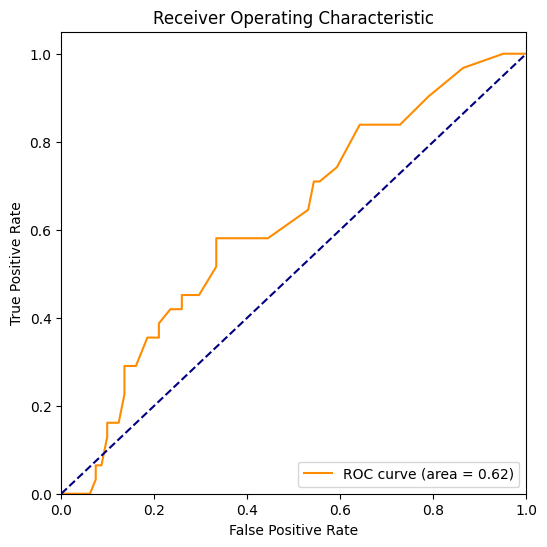

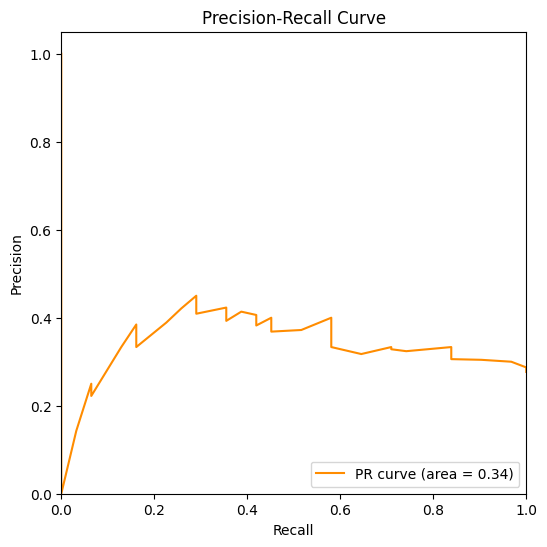

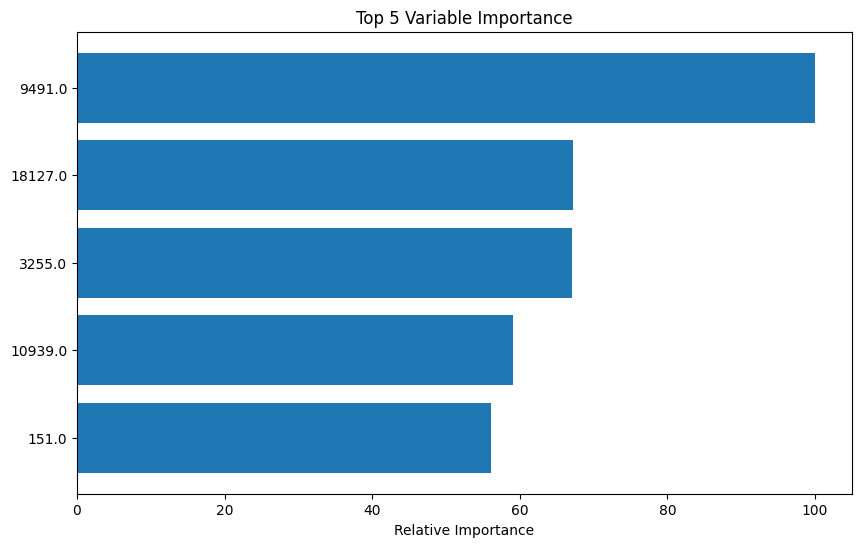

In [207]:
## model With selected Features ##

import numpy as np

best_params_selected_feat = rf_grid_selected.best_params_
print("Best parameters: ", best_params_selected_feat)

# Train a new classifier using the best parameters
rf_selected_best = RandomForestClassifier(**best_params_selected_feat)
rf_selected_best.fit(X_train_selected_df, y_train)


### Selected Feature Model
y_test_rf_pred = rf_selected_best.predict(X_test_selected_df)
y_test_rf_prob = rf_selected_best.predict_proba(X_test_selected_df)

print("\nRandom Forest With Selected Features:")
print_metrics( y_test , y_test_rf_pred, y_test_rf_prob[:,1] )

# Plot ROC and PR curves and print Confusion Matrix
plot_curves_and_cm(y_test , y_test_rf_pred, y_test_rf_prob[:,1] )

feat_importance( clf = rf_selected_best, X_train=X_train_selected_df, no_of_feats = 5 )



Best parameters:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


c:\Users\RTX 3070 TI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest With All Features:
Accuracy: 0.7410714285714286
F1 Score: 0.45283018867924524
ROC AUC: 0.8004778972520908
PR AUC: 0.5417836336330983
Confusion Matrix:
[[71 10]
 [19 12]]


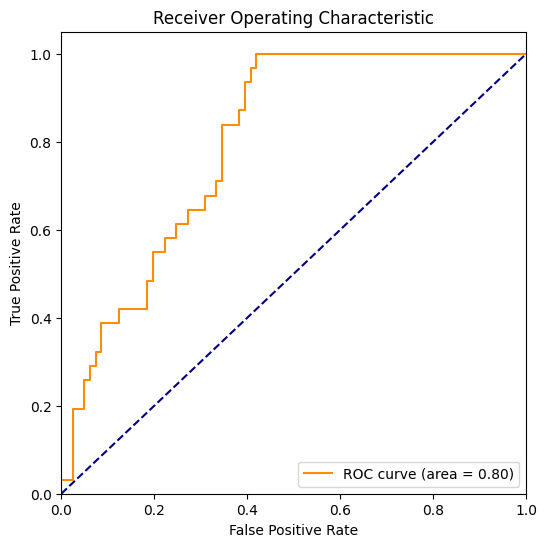

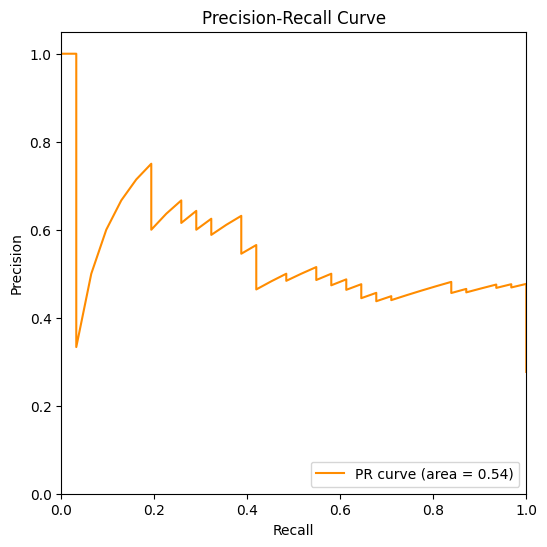

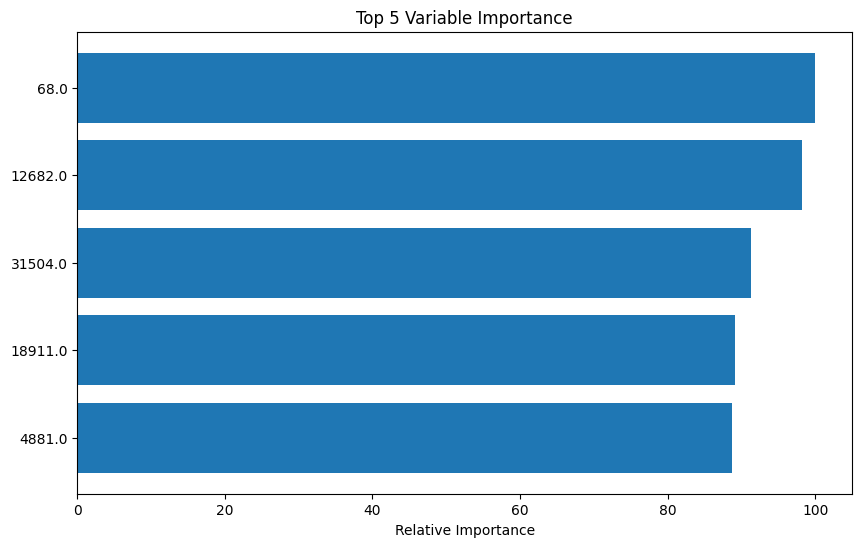

In [209]:
### Model with All features

 


### Selected Feature Model
y_test_all_rf_pred = rf_all_best.predict(X_test_norm)
y_test_all_rf_prob = rf_all_best.predict_proba(X_test_norm)

print("\nRandom Forest With All Features:")
print_metrics( y_test , y_test_all_rf_pred, y_test_all_rf_prob[:,1] )

# Plot ROC and PR curves and print Confusion Matrix
plot_curves_and_cm(y_test , y_test_all_rf_pred, y_test_all_rf_prob[:,1] )


feat_importance( clf = rf_all_best, X_train= X_train_norm, no_of_feats = 5 )




In [218]:
y_test_all_rf_prob

array([[0.55667413, 0.44332587],
       [0.95949505, 0.04050495],
       [0.95856508, 0.04143492],
       [0.65847614, 0.34152386],
       [0.70983159, 0.29016841],
       [0.91043808, 0.08956192],
       [0.99      , 0.01      ],
       [0.73719051, 0.26280949],
       [0.90887662, 0.09112338],
       [0.86843498, 0.13156502],
       [0.91097619, 0.08902381],
       [0.97244048, 0.02755952],
       [0.26890693, 0.73109307],
       [0.77764806, 0.22235194],
       [0.43383808, 0.56616192],
       [0.75851667, 0.24148333],
       [0.74026854, 0.25973146],
       [0.82987843, 0.17012157],
       [0.71195224, 0.28804776],
       [0.92826082, 0.07173918],
       [0.27357297, 0.72642703],
       [0.965625  , 0.034375  ],
       [0.89418849, 0.10581151],
       [0.99490385, 0.00509615],
       [0.65482299, 0.34517701],
       [0.39893515, 0.60106485],
       [0.8090252 , 0.1909748 ],
       [0.64088688, 0.35911312],
       [0.97916667, 0.02083333],
       [0.98822222, 0.01177778],
       [0.